# 1. Iniciando o diálogo

Seja bem-vindo ao primeiro projeto de Aprendizado de Máquina com aplicação prática na agricultura amazônica! 🌱

Neste notebook, vamos trabalhar com dados reais sobre a produtividade do guaraná, relacionando fatores climáticos, sazonais e fenômenos como o El Niño (ENSO).  
Nosso objetivo é prever a produtividade das safras e classificá-las como **baixa**, **média** ou **alta**, utilizando técnicas de **Aprendizado Supervisionado** e, ao final, um toque de **Aprendizado por Reforço**.

---

## 📦 Etapas iniciais

Antes de começar qualquer análise ou modelagem, precisamos preparar o ambiente de trabalho.  
Nesta etapa inicial, vamos:

- Importar as bibliotecas essenciais para análise de dados e visualização;
- Conectar ao ambiente de arquivos (como o Google Drive, se necessário);
- Garantir que as ferramentas estão prontas para uso ao longo do notebook.

### Relatório

Informação

# 🚀 Etapa 1 — Importação de Bibliotecas

Nesta etapa, vamos importar as principais bibliotecas que serão utilizadas durante o projeto. 
Cada uma tem uma função específica, que contribui para análise, manipulação e visualização dos dados:
- **Pandas** → Manipulação de dados em formato de tabelas (DataFrames).
- **NumPy** → Suporte a cálculos numéricos e operações com arrays.
- **Matplotlib** → Criação de gráficos e visualizações.
- **Seaborn** → Biblioteca baseada no Matplotlib, com gráficos mais bonitos e análises estatísticas mais intuitivas.

In [1]:
# Etapa 1 — Importação de bibliotecas

# Importa a biblioteca pandas, utilizada para análise e manipulação de dados em formato de tabelas (DataFrames).
import pandas as pd

# Importa a biblioteca numpy, que oferece suporte a arrays e funções matemáticas de alto desempenho.
import numpy as np

# Importa a biblioteca matplotlib.pyplot, utilizada para criação de gráficos e visualizações estáticas.
import matplotlib.pyplot as plt

# Importa a biblioteca seaborn, que é baseada no matplotlib e fornece uma interface mais amigável para criar gráficos estatísticos com melhor estética.
import seaborn as sns

# 2. Entendendo o problema

Agora que configuramos o ambiente, é hora de mergulhar no problema que queremos resolver.

Neste projeto, vamos trabalhar com um **conjunto de dados reais** sobre a produção agrícola de guaraná no Amazonas, contendo informações sobre:

- Fatores climáticos anuais (chuva, temperatura, umidade)
- Fases do cultivo (floração e colheita)
- Classificação das safras (baixa, média ou alta produtividade)
- Eventos sazonais como o El Niño (ENSO)

---

### 🧭 O que vamos investigar?

Nosso objetivo é usar esses dados para construir modelos capazes de:

1. **Prever a produtividade da safra** (tarefa de regressão)
2. **Classificar a safra como baixa, média ou alta** (tarefa de classificação)

Antes de aplicar modelos, precisamos entender bem:

- As variáveis disponíveis
- As relações entre elas
- A motivação por trás dessas previsões

Essa compreensão começa nos próximos blocos.

## 2.1 🌾 A importância da previsão da produtividade

A previsão da produtividade agrícola é uma ferramenta estratégica para o planejamento da produção, logística e comercialização de culturas como o guaraná, especialmente em regiões como o Amazonas.

Compreender como fatores climáticos afetam a produtividade ajuda:

- Agricultores a **tomar decisões melhores** sobre irrigação, adubação e colheita
- Gestores públicos e cooperativas a se prepararem para **flutuações na oferta**
- Pesquisadores e técnicos a identificar **relações complexas** entre clima e solo

---

### 📍 O caso do guaraná

O guaraná é uma cultura importante da região Norte do Brasil. Sua produção é altamente sensível a:

- Chuvas durante a floração e colheita
- Temperaturas médias no ciclo produtivo
- Eventos climáticos como o **El Niño** (ENSO), que altera padrões de chuva e temperatura

Prever a produtividade com base em dados históricos é uma forma poderosa de aplicar ciência de dados à realidade local.

---

Neste projeto, vamos usar dados históricos com informações anuais de clima e produção de guaraná para desenvolver modelos que aprendem **a prever e classificar a produtividade da safra**.

## 2.2 Variáveis do dataset e suas relações

Vamos agora carregar o conjunto de dados com as informações climáticas e de produtividade do guaraná.  
Esses dados serão a base para todas as etapas de análise e modelagem ao longo do projeto.

# 🗂️ Etapa 2 — Carregamento Inicial do Dataset

Nesta etapa, vamos carregar o dataset **"dataset_produtividade_guarana.csv"** para iniciar a análise. 
O arquivo possui separação de campos por ponto e vírgula (`;`) e usa a vírgula (`','`) como separador decimal, 
seguindo o padrão brasileiro.

In [2]:
# 📥 Carregamento inicial do dataset

# Lê o arquivo CSV e cria um DataFrame chamado 'df'.
# 'sep=";"' indica que os dados estão separados por ponto e vírgula.
# 'decimal=","' informa que o separador decimal utilizado no arquivo é a vírgula.
df = pd.read_csv("dataset_produtividade_guarana.csv", sep=';', decimal=',')

# Exibe as 5 primeiras linhas do DataFrame para uma inspeção inicial dos dados.
df.head()

ano  chuva_durante_floração_mm  chuva_durante_colheita_mm  \
0  1984                      423.2                      516.7   
1  1985                      363.0                      540.0   
2  1986                      320.6                      666.9   
3  1987                      360.0                      180.4   
4  1988                      419.4                      693.8   

   chuva_total_anual_mm  anomalia_chuva_floração_mm  \
0                2459.8                        93.4   
1                2773.6                        33.2   
2                2694.5                        -9.2   
3                2165.2                        30.2   
4                2932.8                        89.6   

   temperatura_média_floração_C  umidade_relativa_média_floração_%  \
0                         26.16                              84.25   
1                         25.78                              84.09   
2                         25.46                              84.24   
3                         26.91                              86.56   
4                         27.80                              85.59   

  evento_ENSO  produtividade_kg_por_ha produtividade_safra  
0      Neutro                      110               media  
1      Neutro                      107               media  
2     El Niño                      109               media  
3     El Niño                       74               baixa  
4     La Niña                      102               media

### 🔤 Renomeando as colunas

Algumas colunas do dataset original possuem nomes longos.  
Vamos renomeá-las para facilitar a leitura e o uso nos gráficos e modelos.

# 🏷️ Etapa 3 — Renomeando as Colunas do Dataset

Para facilitar a manipulação e análise dos dados, vamos renomear algumas colunas do dataset, deixando os nomes mais curtos e intuitivos.

🔧 **Dicionário de renomeação:**
- `chuva_durante_floração_mm` → `chuva_flor`
- `chuva_durante_colheita_mm` → `chuva_colheita`
- `chuva_total_anual_mm` → `chuva_total`
- `anomalia_chuva_floração_mm` → `anomalia_flor`
- `temperatura_média_floração_C` → `temp_flor`
- `umidade_relativa_média_floração_%` → `umid_flor`
- `evento_ENSO` → `ENSO`
- `produtividade_kg_por_ha` → `produtividade`
- `produtividade_safra` → `safra`

In [3]:
# 🏷️ Renomeando as colunas do dataset

# Utiliza o método rename() para alterar os nomes de colunas, tornando-os mais curtos e fáceis de manipular.
# O parâmetro inplace=True faz com que a alteração seja aplicada diretamente no DataFrame 'df', sem a necessidade de criar um novo.
df.rename(columns={
    'chuva_durante_floração_mm': 'chuva_flor',        # Chuva durante a floração
    'chuva_durante_colheita_mm': 'chuva_colheita',    # Chuva durante a colheita
    'chuva_total_anual_mm': 'chuva_total',            # Chuva total anual
    'anomalia_chuva_floração_mm': 'anomalia_flor',    # Anomalia de chuva na floração
    'temperatura_média_floração_C': 'temp_flor',      # Temperatura média na floração
    'umidade_relativa_média_floração_%': 'umid_flor', # Umidade relativa média na floração
    'evento_ENSO': 'ENSO',                            # Evento climático ENSO
    'produtividade_kg_por_ha': 'produtividade',       # Produtividade (kg por hectare)
    'produtividade_safra': 'safra'                    # Produtividade da safra
}, inplace=True)

### 🔧 Ajustes adicionais

- A variável de umidade estava expressa em porcentagem. Vamos convertê-la para escala fracionária (ex: 80% → 0.80).
- Também definimos o ano como índice da tabela, pois ele será útil para análises temporais.

# 🔧 Etapa 4 — Ajustes nos Dados e Definição do Índice

Nesta etapa, realizamos dois ajustes importantes nos dados:

1. 🔢 **Ajuste na variável de umidade:**  
A coluna `umid_flor` estava representada em porcentagem (ex.: 80%). Convertê-la para proporção (ex.: 0.80) facilita certos cálculos estatísticos e modelos.

2. 📅 **Definição do índice:**  
O ano (`ano`) passa a ser usado como índice do DataFrame, o que é útil para análises temporais, séries históricas e facilita visualizações.


In [4]:
# 🔧 Ajuste da variável 'umid_flor' de porcentagem para proporção
df['umid_flor'] = df['umid_flor'] / 100

# 📅 Define a coluna 'ano' como índice do DataFrame
# Isso ajuda em análises temporais e na organização dos dados por ano.
df.set_index('ano', inplace=True)

# 🔍 Visualiza as 5 primeiras linhas do DataFrame para confirmar as alterações
df.head()

chuva_flor  chuva_colheita  chuva_total  anomalia_flor  temp_flor  \
ano                                                                       
1984       423.2           516.7       2459.8           93.4      26.16   
1985       363.0           540.0       2773.6           33.2      25.78   
1986       320.6           666.9       2694.5           -9.2      25.46   
1987       360.0           180.4       2165.2           30.2      26.91   
1988       419.4           693.8       2932.8           89.6      27.80   

      umid_flor     ENSO  produtividade  safra  
ano                                             
1984     0.8425   Neutro            110  media  
1985     0.8409   Neutro            107  media  
1986     0.8424  El Niño            109  media  
1987     0.8656  El Niño             74  baixa  
1988     0.8559  La Niña            102  media

## 2.3 🎯 Tarefas de aprendizado supervisionado e objetivos do projeto

Com o dataset carregado e compreendido, podemos agora definir as **duas tarefas principais** que resolveremos ao longo deste projeto.

---

### 📈 1. Regressão — Prever a produtividade

Nesta tarefa, o objetivo será construir um modelo que receba como entrada variáveis climáticas e sazonais, e gere como saída a **produtividade estimada em kg/ha**.

Isso nos permite prever a produtividade com base em cenários climáticos futuros, auxiliando o planejamento agrícola.

---

### 🧮 2. Classificação — Categorizar a safra

Nesta tarefa, vamos transformar a produtividade em **categorias discretas**:

- `baixa`
- `média`
- `alta`

O modelo de classificação tentará **prever o rótulo da safra**, o que é útil para:

- Diagnósticos rápidos
- Alertas sazonais
- Análises qualitativas

---

### 🚀 Objetivo final

Ao longo do projeto, vamos construir modelos supervisionados para essas duas tarefas, avaliar seus desempenhos e visualizar seus comportamentos.

Além disso, encerraremos com um **desafio opcional de Aprendizagem por Reforço**, que explora decisões sequenciais aplicadas à irrigação.

Agora que o problema está compreendido, vamos explorar os dados!

# 3. Análise Exploratória dos Dados (EDA)

Antes de treinar qualquer modelo, é fundamental entender o comportamento dos dados.  
A **Análise Exploratória de Dados (EDA)** nos ajuda a:

- Visualizar a distribuição das variáveis
- Detectar padrões, tendências e possíveis outliers
- Investigar relações entre clima e produtividade
- Identificar quais fatores parecem mais influentes

---

Nesta etapa, vamos construir diversos gráficos, como:

- Dispersão entre variáveis climáticas e produtividade
- Boxplots comparando categorias (ex: ENSO)
- Histogramas para entender a distribuição dos dados
- Correlação entre variáveis
- Componentes principais (PCA) para redução de dimensionalidade

Esses gráficos serão essenciais para formular hipóteses e escolher abordagens adequadas de modelagem.

## 3.1 Diagnóstico inicial do dataset

## 3.1 Diagnóstico inicial do dataset

Vamos começar explorando a estrutura geral do conjunto de dados.  
Nesta etapa inicial, buscamos responder perguntas como:

- Quantas observações existem?
- Quais são os tipos de variáveis?
- Há dados ausentes?
- Como se comportam os valores mínimos, máximos e médios?

Para isso, utilizamos os métodos `.info()`, `.isnull()` e `.describe()`, que nos fornecem um panorama estatístico e estrutural do dataframe.


# 🔎 Etapa 5 — Análise Inicial dos Dados (Exploração e Qualidade)

Nesta etapa, vamos fazer uma análise exploratória inicial para entender melhor a estrutura e qualidade dos dados. As ações realizadas são:

1. 📜 **Análise da estrutura do DataFrame:**  
Verificar o tipo de cada coluna, quantidade de entradas e consumo de memória.

2. 🧹 **Verificação de dados ausentes:**  
Analisar se há valores faltantes nas colunas.

3. 📊 **Análise estatística descritiva:**  
Observar medidas como média, desvio padrão, mínimo, máximo e quartis de cada variável numérica.

In [5]:
# 📜 Ver informações gerais do DataFrame
# Mostra o número de entradas, tipos de dados de cada coluna, e se há valores nulos.
df.info()

# 🧹 Verificar valores ausentes em cada coluna
# isnull().sum() retorna a soma dos valores nulos por coluna.
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# 📊 Resumo estatístico do DataFrame
# describe() retorna estatísticas como média, desvio padrão, mínimo, máximo e quartis.
# O .T faz a transposição, exibindo as colunas na vertical para melhor visualização.
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1984 to 2023
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chuva_flor      40 non-null     float64
 1   chuva_colheita  40 non-null     float64
 2   chuva_total     40 non-null     float64
 3   anomalia_flor   40 non-null     float64
 4   temp_flor       40 non-null     float64
 5   umid_flor       40 non-null     float64
 6   ENSO            40 non-null     object 
 7   produtividade   40 non-null     int64  
 8   safra           40 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 3.1+ KB

Valores ausentes por coluna:
chuva_flor        0
chuva_colheita    0
chuva_total       0
anomalia_flor     0
temp_flor         0
umid_flor         0
ENSO              0
produtividade     0
safra             0
dtype: int64


count         mean         std        min          25%  \
chuva_flor       40.0   350.110000  103.369868   132.6000   282.900000   
chuva_colheita   40.0   467.175000  177.934808    39.7000   363.650000   
chuva_total      40.0  2532.797500  382.051048  1889.4000  2243.575000   
anomalia_flor    40.0    20.310000  103.369868  -197.2000   -46.900000   
temp_flor        40.0    27.313000    0.949186    24.8300    26.895000   
umid_flor        40.0     0.820178    0.037551     0.7468     0.787375   
produtividade    40.0   137.300000   70.966298    50.0000    98.750000   

                      50%         75%        max  
chuva_flor       360.9000   420.35000   657.5000  
chuva_colheita   489.3500   580.25000   756.9000  
chuva_total     2469.4500  2826.85000  3432.9000  
anomalia_flor     31.1000    90.55000   327.7000  
temp_flor         27.5050    27.91000    28.6300  
umid_flor          0.8289     0.85285     0.8787  
produtividade    123.0000   157.75000   399.0000

## 3.2 📊 Gráficos exploratórios

Agora que conhecemos a estrutura geral dos dados, vamos usar visualizações para entender melhor o comportamento das variáveis.

A análise gráfica permite:

- Detectar padrões e tendências
- Comparar produtividades em diferentes condições climáticas
- Verificar a distribuição dos dados
- Explorar relações entre variáveis contínuas e categóricas

Nos próximos blocos, você verá:

- Comparações de produtividade entre eventos ENSO
- Dispersão entre temperatura e produtividade
- Distribuições e correlações das variáveis climáticas

### 3.2.1 Boxplot: ENSO × Produtividade

O fenômeno climático El Niño–Oscilação Sul (ENSO) afeta padrões de chuva e temperatura.  
Neste gráfico, comparamos a produtividade agrícola em anos classificados como `El Niño`, `La Niña` ou `Neutro`.

O boxplot nos ajuda a observar:

- Tendências de produtividade por evento
- Variação dentro de cada grupo
- Presença de possíveis outliers

# 📊 Etapa 6 — Análise Gráfica: Produtividade vs. Evento ENSO (Boxplot)

Nesta etapa, criamos um **boxplot** para analisar a distribuição da produtividade agrícola em relação aos eventos climáticos **ENSO** (*El Niño, La Niña e Neutro*).

- 🔹 A versão inicial utilizava um boxplot básico.
- 🔧 A versão refinada melhora a estética do gráfico:
  - Define um estilo de grade clara e uma paleta de cores acessível (colorblind).
  - Ordena os eventos ENSO na sequência: `La Niña`, `Neutro` e `El Niño`.
  - Adiciona título, rótulos nos eixos e melhora a legibilidade dos textos.

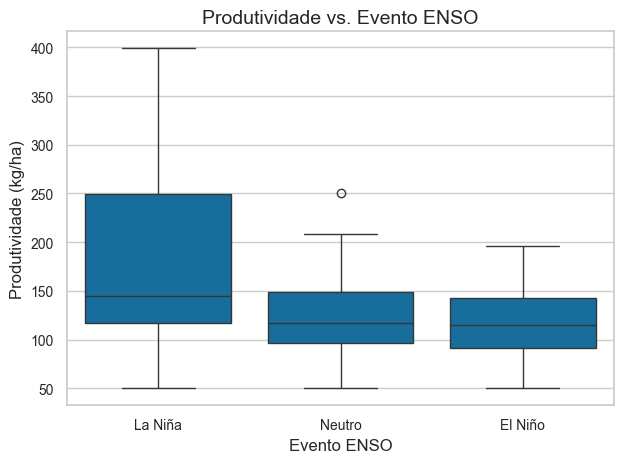

In [6]:
# 📦 Versão inicial simples (comentada)
# sns.boxplot(data=df, x='ENSO', y='produtividade')

# 🎨 Versão refinada com melhorias estéticas e informativas

# Define o estilo do gráfico e uma paleta de cores acessível
sns.set(style="whitegrid", palette="colorblind")

# Cria o boxplot da produtividade em função dos eventos ENSO
sns.boxplot(
    data=df,
    x='ENSO',                          # Eixo X → Evento ENSO (La Niña, Neutro, El Niño)
    y='produtividade',                  # Eixo Y → Produtividade (kg/ha)
    order=['La Niña', 'Neutro', 'El Niño']  # Ordem desejada no eixo X
)

# 🔠 Adiciona título e rótulos aos eixos
plt.title('Produtividade vs. Evento ENSO', fontsize=14)
plt.xlabel('Evento ENSO', fontsize=12)
plt.ylabel('Produtividade (kg/ha)', fontsize=12)

# 🔡 Ajusta o tamanho das fontes dos ticks (valores dos eixos)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 🔧 Ajusta o layout para evitar sobreposição
plt.tight_layout()

# 📈 Exibe o gráfico
plt.show()


### 3.2.2 Scatter: Temperatura × Produtividade

Aqui, exploramos a relação entre a temperatura média durante a floração e a produtividade da safra.

Cada ponto representa um ano, e a cor indica o tipo de evento ENSO.  
Com esse gráfico, buscamos identificar padrões visuais que indiquem:

- Faixas ideais de temperatura
- Efeitos do ENSO sobre a produtividade

# 🌡️ Etapa 7 — Análise Gráfica: Temperatura na Floração vs. Produtividade (Scatterplot)

Nesta etapa, criamos um **gráfico de dispersão (scatterplot)** para visualizar a relação entre:

- 🔥 **Temperatura média durante a floração** (eixo X)  
- 🌾 **Produtividade agrícola** (eixo Y)

Além disso, as observações são coloridas de acordo com os eventos climáticos **ENSO** (*La Niña, Neutro e El Niño*), permitindo identificar possíveis padrões ou impactos desses eventos na relação entre temperatura e produtividade.

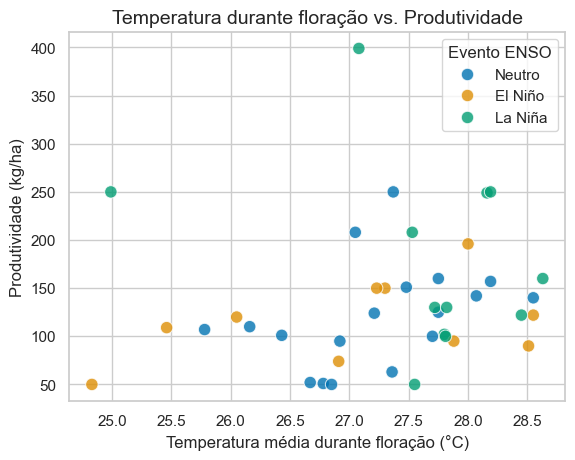

In [7]:
# 🌡️ Cria um gráfico de dispersão (scatterplot) para analisar a relação entre temperatura na floração e produtividade

sns.scatterplot(
    data=df,
    x='temp_flor',               # Eixo X → Temperatura média durante a floração (°C)
    y='produtividade',           # Eixo Y → Produtividade (kg/ha)
    hue='ENSO',                  # Agrupa os pontos por evento ENSO (cores diferentes)
    s=80,                        # Tamanho dos pontos
    alpha=0.8                    # Transparência dos pontos (para melhorar a visualização quando há sobreposição)
)

# 🔠 Adiciona título e rótulos aos eixos
plt.title('Temperatura durante floração vs. Produtividade', fontsize=14)
plt.xlabel('Temperatura média durante floração (°C)', fontsize=12)
plt.ylabel('Produtividade (kg/ha)', fontsize=12)

# 🎨 Adiciona legenda com título
plt.legend(title='Evento ENSO')

### 3.2.3 Histogramas de variáveis numéricas

Este conjunto de histogramas mostra a distribuição das variáveis numéricas do dataset.

Podemos observar:

- Se há assimetrias ou concentrações
- Valores extremos (outliers)
- Faixas mais frequentes para temperatura, umidade, chuva e produtividade


# 📈 Etapa 8 — Análise das Distribuições das Variáveis Numéricas (Histogramas)

Nesta etapa, geramos **histogramas** para analisar a distribuição de todas as variáveis numéricas do dataset.

🔍 **Objetivos:**
- Verificar se as distribuições são simétricas, assimétricas, normais ou apresentam outliers.
- Compreender melhor o comportamento dos dados antes de realizar análises estatísticas ou modelagens.

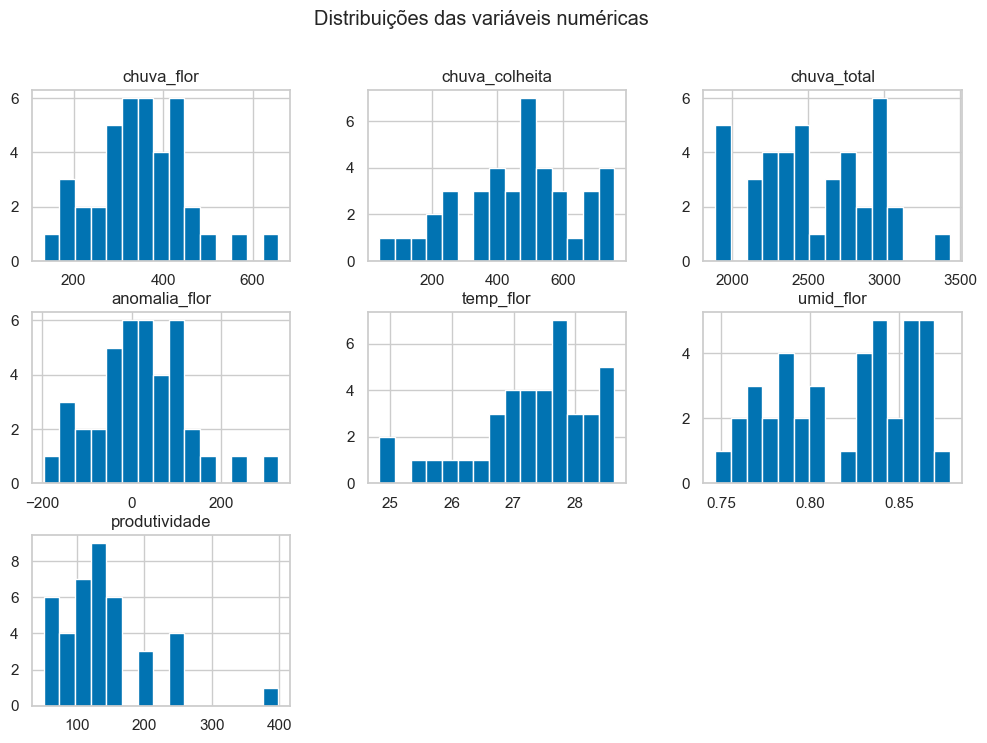

In [8]:
# 📊 Gera histogramas para todas as variáveis numéricas do DataFrame

df.select_dtypes(include='number').hist(  # Seleciona apenas colunas numéricas e gera histogramas
    bins=15,                              # Define o número de divisões (bins) dos histogramas
    figsize=(12, 8)                       # Define o tamanho da figura (largura, altura)
)

# 🔠 Adiciona um título geral ao conjunto de gráficos
plt.suptitle("Distribuições das variáveis numéricas")

# 📈 Exibe os histogramas
plt.show()

### 3.2.4 Heatmap de Correlação

Aqui, analisamos a **correlação entre variáveis numéricas**.

O mapa de calor (heatmap) destaca:

- Relações fortes (positivas ou negativas)
- Variáveis redundantes (alta correlação entre si)
- Fatores que podem influenciar diretamente a produtividade

Isso nos ajuda a selecionar variáveis relevantes e evitar multicolinearidade.

# 🔥 Etapa 9 — Análise de Correlação entre Variáveis Numéricas (Heatmap)

Nesta etapa, construímos uma **matriz de correlação** para avaliar as relações lineares entre as variáveis numéricas do dataset.

🔍 **Objetivos:**
- Identificar quais variáveis possuem correlação forte, moderada ou fraca entre si.
- Entender possíveis relações que impactam na produtividade, como influência da temperatura, chuva ou umidade.

A visualização é feita através de um **heatmap**, que permite identificar facilmente padrões de correlação positiva (vermelho) ou negativa (azul).

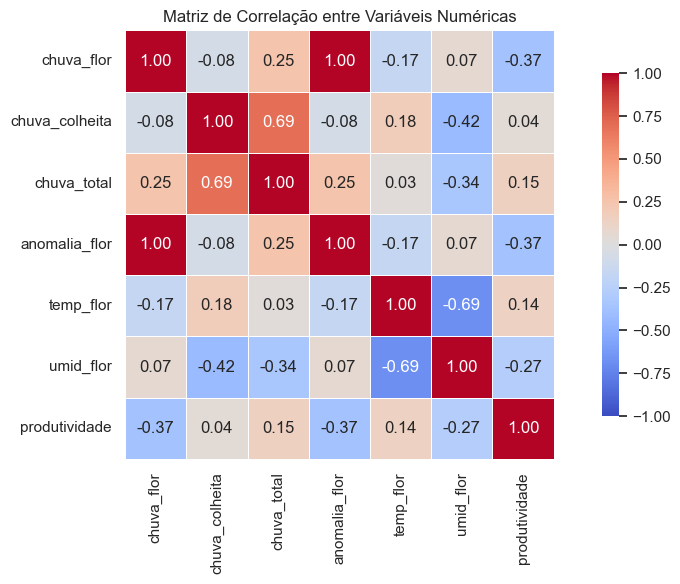

In [9]:
# 🔢 Seleciona apenas as colunas numéricas do DataFrame
variaveis_numericas = df.select_dtypes(include='number')

# 🧠 Calcula a matriz de correlação entre as variáveis numéricas
correlacao = variaveis_numericas.corr()

# 🎨 Cria o heatmap da matriz de correlação
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

sns.heatmap(
    correlacao,              # Dados da matriz de correlação
    annot=True,              # Exibe os valores numéricos dentro das células
    fmt=".2f",               # Formato dos números (2 casas decimais)
    cmap='coolwarm',         # Paleta de cores (vermelho → positivo, azul → negativo)
    linewidths=0.5,          # Espessura das linhas que separam as células
    square=True,             # Deixa as células quadradas
    cbar_kws={"shrink": .8}, # Ajusta o tamanho da barra de cor
    vmin=-1, vmax=1          # Limita os valores da escala entre -1 e 1
)

# 🔠 Adiciona título ao gráfico
plt.title('Matriz de Correlação entre Variáveis Numéricas')

# 🔧 Ajusta o layout para evitar sobreposição
plt.tight_layout()

# 📈 Exibe o heatmap
plt.show()


### 3.2.5 Pairplot

Este gráfico combina múltiplas dispersões e histogramas em uma só visualização.

O objetivo é:

- Visualizar pares de variáveis simultaneamente
- Ver como a produtividade se distribui em relação a cada uma delas
- Observar agrupamentos visuais por tipo de safra (baixa, média, alta)

Essa visão é útil antes de aplicar técnicas como PCA ou regressão.

# 🔗 Etapa 10 — Análise Multivariada: Matriz de Dispersão (Pairplot)

Nesta etapa, criamos uma **matriz de dispersão (pairplot)** que permite visualizar simultaneamente as relações entre múltiplas variáveis numéricas.

🚀 Foram feitas duas versões:
- **Versão inicial:** apenas as variáveis numéricas, sem distinção por ENSO.
- **Versão refinada:** inclui a variável categórica **ENSO**, permitindo observar como os eventos climáticos impactam as relações entre variáveis.

🔍 **Objetivos:**
- Observar padrões, tendências e possíveis relações lineares ou não lineares.
- Detectar agrupamentos ou outliers.

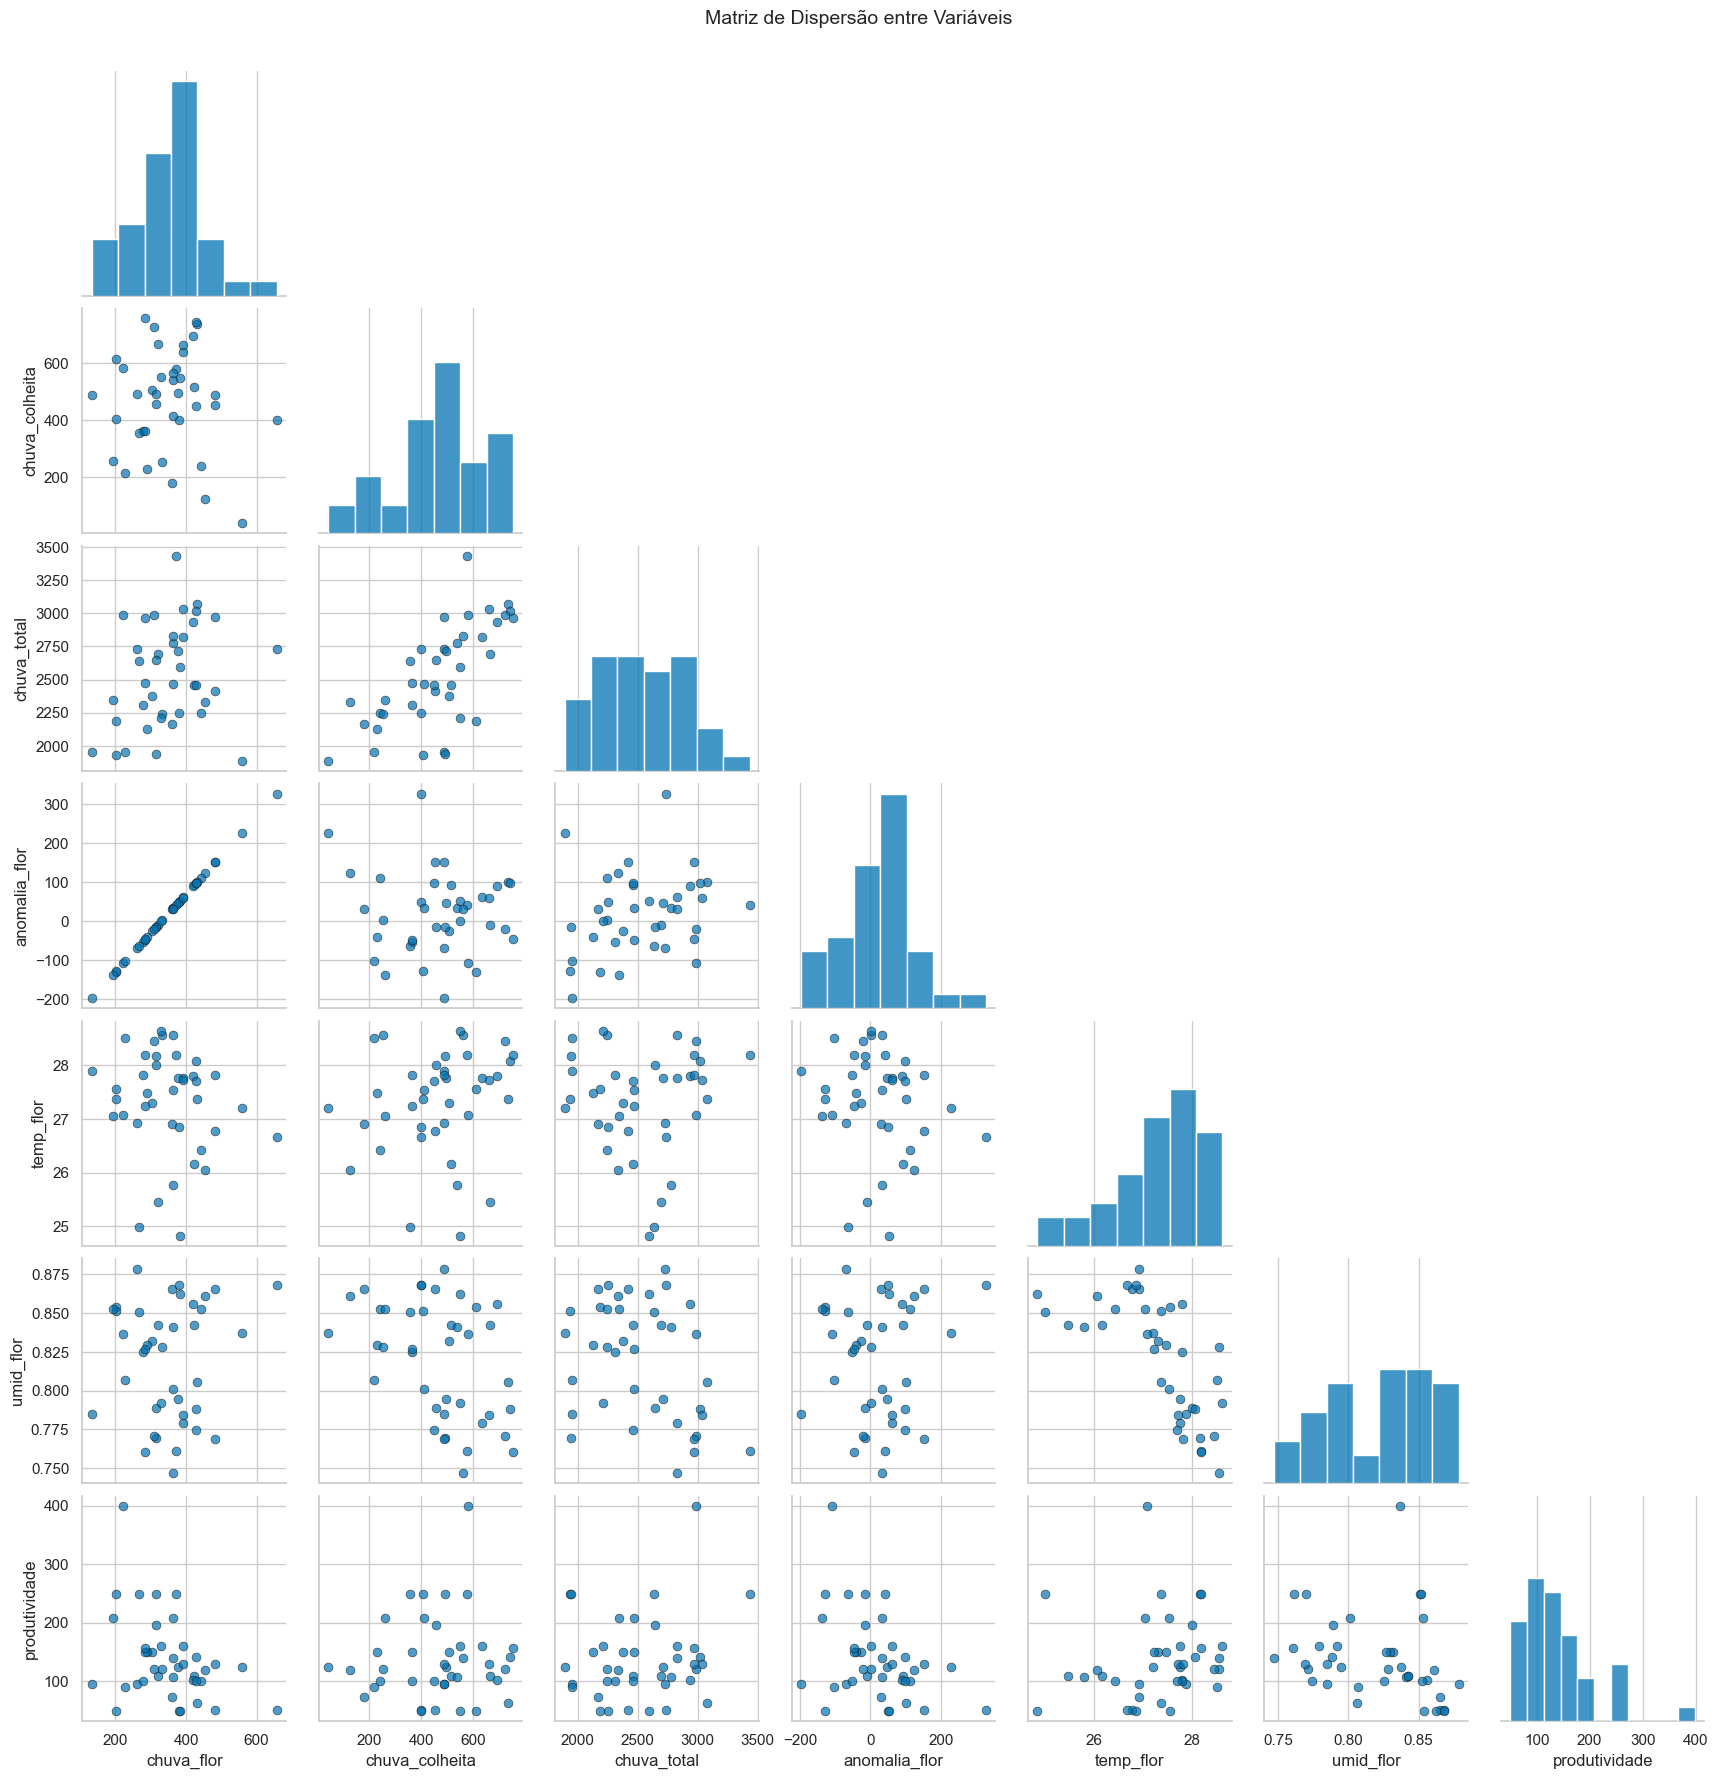

In [10]:
# 🔢 Seleciona as variáveis numéricas (excluindo o ano)
cols_plot = ['chuva_flor', 'chuva_colheita', 'chuva_total',
             'anomalia_flor', 'temp_flor', 'umid_flor', 'produtividade']

# 🎨 Cria a matriz de dispersão (pairplot) - Versão inicial sem considerar ENSO
sns.pairplot(
    df[cols_plot],
    corner=True,       # Plota apenas a metade inferior da matriz, evitando duplicação
    diag_kind='hist',  # Usa histogramas na diagonal (pode ser 'kde' para densidade)
    plot_kws={         # Configurações dos gráficos de dispersão
        'alpha': 0.7,  # Transparência dos pontos
        's': 40,       # Tamanho dos pontos
        'edgecolor': 'k'  # Cor da borda dos pontos (k = preto)
    }
)

# 🔠 Adiciona título geral ao conjunto de gráficos
plt.suptitle("Matriz de Dispersão entre Variáveis", fontsize=14, y=1.02)

# 📈 Exibe o gráfico
plt.show()

# 4. Engenharia de Atributos

Após explorar visualmente os dados, é hora de **preparar as variáveis para os modelos de Machine Learning**.

Essa preparação é chamada de **engenharia de atributos** e envolve:

- Transformações
- Criação de variáveis novas
- Codificações necessárias
- Representações numéricas para variáveis categóricas

Nosso objetivo é fornecer aos modelos entradas mais informativas e organizadas, sem perder a interpretação original das variáveis.

Nesta seção, vamos:

- Criar uma variável de **chuva relativa**
- Codificar o evento ENSO em variáveis binárias
- Transformar a variável-alvo da classificação (safra) em valores numéricos

## 4.1 Criação de variáveis sazonais e climáticas

A variável `chuva_relativa` representa a fração da chuva total anual que ocorreu durante a floração.  
Essa relação pode ser mais informativa do que usar os valores absolutos separadamente.

# 🧠 Etapa 11 — Criação de Novas Variáveis (Feature Engineering)

Nesta etapa, foram criadas duas novas variáveis derivadas para enriquecer a análise:

1️⃣ **chuva_relativa** — Proporção da chuva durante a floração em relação à chuva total do ano.  
→ Avalia o quanto da chuva anual ocorreu no período crítico da floração.

2️⃣ **anomalia_bin** — Indicador binário de anomalia positiva na chuva durante a floração.  
→ Recebe valor **1** se houve anomalia positiva (mais chuva que o esperado), e **0** caso contrário.

🔧 Esse tipo de transformação é conhecido como **feature engineering** e é fundamental para extrair mais valor dos dados antes de análises estatísticas ou modelos preditivos.

In [11]:
# 🌧️ 1. Cria a variável 'chuva_relativa'
# Calcula a proporção entre a chuva durante a floração e a chuva total do ano
df['chuva_relativa'] = df['chuva_flor'] / df['chuva_total']

# 🚩 2. Cria a variável binária 'anomalia_bin'
# Atribui 1 se a anomalia na floração for positiva (acima da média) e 0 caso contrário
df['anomalia_bin'] = (df['anomalia_flor'] > 0).astype(int)

# 🔍 Verifica as 5 primeiras linhas para conferir as novas variáveis
df.head()

chuva_flor  chuva_colheita  chuva_total  anomalia_flor  temp_flor  \
ano                                                                       
1984       423.2           516.7       2459.8           93.4      26.16   
1985       363.0           540.0       2773.6           33.2      25.78   
1986       320.6           666.9       2694.5           -9.2      25.46   
1987       360.0           180.4       2165.2           30.2      26.91   
1988       419.4           693.8       2932.8           89.6      27.80   

      umid_flor     ENSO  produtividade  safra  chuva_relativa  anomalia_bin  
ano                                                                           
1984     0.8425   Neutro            110  media        0.172047             1  
1985     0.8409   Neutro            107  media        0.130877             1  
1986     0.8424  El Niño            109  media        0.118983             0  
1987     0.8656  El Niño             74  baixa        0.166266             1  
1988     0.8559  La Niña            102  media        0.143003             1

## 4.2 Codificação de variáveis categóricas (ENSO)

A variável `ENSO` representa o tipo de evento climático do ano (`Neutro`, `El Niño`, `La Niña`).  
Modelos de machine learning exigem que variáveis categóricas sejam convertidas em números.  
Aqui, usamos a técnica de **codificação one-hot (dummies)** para gerar colunas binárias: `ENSO_La Niña` e `ENSO_Neutro`.

# 🏷️ Etapa 12 — Codificação de Variáveis Categóricas (Dummies para ENSO)

Nesta etapa, a variável categórica **ENSO** (com três categorias: *Neutro*, *El Niño*, *La Niña*) foi transformada em variáveis numéricas do tipo **dummy (one-hot encoding)**.

🚩 Para evitar multicolinearidade, foi utilizado o parâmetro `drop_first=True`, que remove uma das categorias (*Neutro*) e utiliza como referência.

O resultado são duas novas colunas:
- **ENSO_El Niño** → 1 se o ano é El Niño, 0 caso contrário.  
- **ENSO_La Niña** → 1 se o ano é La Niña, 0 caso contrário.  
Se ambas forem 0, significa que o evento é **Neutro** (categoria de referência).

🔧 Essa transformação é essencial para aplicar modelos estatísticos e de machine learning que exigem variáveis numéricas.

In [12]:
# 🔢 Codificação da variável categórica 'ENSO' em variáveis dummy
# Cria colunas binárias ENSO_El Niño e ENSO_La Niña
# O parâmetro drop_first=True remove a primeira categoria (Neutro), que passa a ser a base de comparação
df = pd.get_dummies(df, columns=['ENSO'], drop_first=True)

# 🔍 Exibe as 10 primeiras linhas para conferir as novas colunas
df.head(10)

chuva_flor  chuva_colheita  chuva_total  anomalia_flor  temp_flor  \
ano                                                                       
1984       423.2           516.7       2459.8           93.4      26.16   
1985       363.0           540.0       2773.6           33.2      25.78   
1986       320.6           666.9       2694.5           -9.2      25.46   
1987       360.0           180.4       2165.2           30.2      26.91   
1988       419.4           693.8       2932.8           89.6      27.80   
1989       480.9           454.1       2416.7          151.1      26.78   
1990       657.5           399.6       2732.2          327.7      26.67   
1991       454.5           125.3       2332.2          124.7      26.05   
1992       557.5            39.7       1889.4          227.7      27.21   
1993       380.3           401.2       2250.9           50.5      26.85   

      umid_flor  produtividade  safra  chuva_relativa  anomalia_bin  \
ano                                                                   
1984     0.8425            110  media        0.172047             1   
1985     0.8409            107  media        0.130877             1   
1986     0.8424            109  media        0.118983             0   
1987     0.8656             74  baixa        0.166266             1   
1988     0.8559            102  media        0.143003             1   
1989     0.8653             51  baixa        0.198990             1   
1990     0.8680             52  baixa        0.240649             1   
1991     0.8610            120  media        0.194880             1   
1992     0.8373            124   alta        0.295067             1   
1993     0.8684             50  baixa        0.168955             1   

      ENSO_La Niña  ENSO_Neutro  
ano                              
1984         False         True  
1985         False         True  
1986         False        False  
1987         False        False  
1988          True        False  
1989         False         True  
1990         False         True  
1991         False        False  
1992         False         True  
1993         False         True

# 🔍 Etapa 13 — Verificação das Variáveis Dummies Criadas (ENSO)

Após criar as variáveis dummies para o evento **ENSO**, é importante verificar se a codificação foi realizada corretamente.

Utilizamos o método `.filter(like='ENSO')` para selecionar todas as colunas cujos nomes contenham 'ENSO' e inspecionamos as **10 últimas linhas** do dataframe.

🔎 Isso permite confirmar se:
- As colunas **ENSO_El Niño** e **ENSO_La Niña** foram corretamente criadas.
- Os valores estão binários (**0 ou 1**) e coerentes.
- A ausência de 1 em ambas indica anos com **ENSO Neutro** (categoria de referência).

In [13]:
# 🔍 Filtra e exibe apenas as colunas que contêm 'ENSO' no nome
# Mostra as 10 últimas linhas do dataframe para conferir a codificação das dummies
df.filter(like='ENSO').tail(10)

ENSO_La Niña  ENSO_Neutro
ano                            
2014         False         True
2015         False        False
2016          True        False
2017         False         True
2018         False         True
2019         False         True
2020          True        False
2021          True        False
2022          True        False
2023         False        False

# 5. Preparação para o modelo

Com os atributos prontos, vamos agora preparar os dados para treinar os modelos de Machine Learning.

Essa etapa envolve:

- Selecionar as variáveis preditoras e a variável-alvo
- Separar variáveis numéricas e binárias
- Padronizar os dados numéricos
- Dividir os dados em treino e teste de forma coerente

O objetivo é garantir que os modelos recebam os dados em um formato ideal e que possamos avaliar o desempenho com justiça.

## 5.1 Seleção de variáveis

Selecionamos aqui:

- A variável-alvo para regressão (`produtividade`)
- As variáveis preditoras (`X`), removendo as colunas `safra` (usada na tarefa de classificação) e `produtividade` (alvo)

Essa seleção será usada nos modelos de regressão linear com e sem PCA.

# 🏗️ Etapa 14 — Definição das Variáveis Independentes (X) e Dependente (y)

Nesta etapa, preparamos os dados para modelagem:

- **Variável dependente (y):**  
→ **produtividade**, que é o alvo que queremos prever (valor numérico em kg/ha).

- **Variáveis independentes (X):**  
→ Todas as outras colunas, exceto:
  - **produtividade** (pois é o alvo da regressão).
  - **safra**, que é uma variável categórica mais adequada para problemas de classificação, não sendo utilizada na regressão atual.

🔧 Este é um passo essencial antes de ajustar qualquer modelo estatístico ou de machine learning.

In [14]:
# 🎯 Define as variáveis para o modelo

# 📦 X → Variáveis independentes (todas menos 'produtividade' e 'safra')
X = df.drop(columns=['produtividade', 'safra'])

# 🎯 y → Variável dependente (alvo), que queremos prever
y = df['produtividade']

## 5.2 Identificação dos tipos de variáveis

# 🗂️ Etapa 15 — Organização das Variáveis Numéricas e Binárias

Nesta etapa, organizamos as variáveis em dois grupos:

- 🔢 **Colunas Numéricas:**  
Variáveis contínuas que representam medidas quantitativas (chuvas, temperatura, umidade, etc.).  
Lista: 
- 'chuva_flor'
- 'chuva_colheita'
- 'chuva_total'
- 'anomalia_flor'
- 'temp_flor'
- 'umid_flor'
- 'chuva_relativa'

- 🟩 **Colunas Binárias:**  
Variáveis categóricas convertidas para binário (0 ou 1), que indicam presença/ausência de características específicas.  
Lista:
- 'anomalia_bin' → Se houve anomalia positiva na floração.
- 'ENSO_La Niña' → Se o ano foi La Niña.
- 'ENSO_Neutro' → Se o ano foi Neutro. (❗Verificar se faz sentido manter, já que normalmente uma dummy fica como base)

🔍 Essa separação é útil tanto para análises estatísticas, quanto para pré-processamento em modelos de machine learning (normalização, encoding, etc.).

In [15]:
# 🔢 Lista das variáveis numéricas (variáveis contínuas)
colunas_numericas = [
    'chuva_flor',
    'chuva_colheita',
    'chuva_total',
    'anomalia_flor',
    'temp_flor',
    'umid_flor',
    'chuva_relativa'
]

# 🟩 Lista das variáveis binárias (dummies e variáveis categóricas codificadas)
colunas_binarias = [
    'anomalia_bin',
    'ENSO_La Niña',
    'ENSO_Neutro'  # ❗Possível erro: se usamos drop_first=True, ENSO_Neutro não deveria existir. Conferir.
]


## 5.3 Padronização com ColumnTransformer

Usamos o `StandardScaler` para padronizar as variáveis numéricas (média 0 e desvio padrão 1).  
Essa padronização evita que variáveis com escalas diferentes tenham pesos desproporcionais nos modelos.

O `ColumnTransformer` permite aplicar transformações diferentes em grupos de colunas, mantendo as variáveis binárias inalteradas.

# ⚙️ Etapa 16 — Importação de Ferramentas para Pré-processamento dos Dados

Nesta etapa, importamos as classes necessárias para realizar o **pré-processamento dos dados**, etapa essencial antes de treinar modelos de machine learning.

- 🔧 **StandardScaler:**  
Utilizado para **padronizar** as variáveis numéricas, centralizando os dados em média 0 e desvio padrão 1. Isso garante que as variáveis estejam na mesma escala, beneficiando modelos sensíveis à magnitude dos dados.

- 🏗️ **ColumnTransformer:**  
Permite aplicar diferentes transformações em subconjuntos de colunas do dataframe.  
Exemplo: aplicar padronização apenas nas variáveis numéricas, mantendo as variáveis binárias sem alteração.

👉 Esses pré-processadores fazem parte da biblioteca **scikit-learn**, uma das mais usadas em machine learning.

In [16]:
# 🔧 Importa o StandardScaler para padronização (média 0 e desvio padrão 1)
from sklearn.preprocessing import StandardScaler

# 🏗️ Importa o ColumnTransformer para aplicar transformações em colunas específicas
from sklearn.compose import ColumnTransformer

# 🔄 Etapa 17 — Criação do Transformador para Pré-processamento

Nesta etapa, construímos um objeto do tipo **ColumnTransformer** para aplicar diferentes transformações nas colunas do dataset:

- Para as **variáveis numéricas**, aplicamos o **StandardScaler**, que padroniza os dados para média zero e desvio padrão 1.
- Para as **variáveis binárias**, utilizamos o parâmetro `'passthrough'`, que mantém essas colunas inalteradas, pois já estão em formato adequado para modelos.

Esse método permite organizar o pré-processamento de forma clara, consistente e facilmente reutilizável, especialmente útil em pipelines de machine learning.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 🔄 Cria o pré-processador para as variáveis
preprocessador = ColumnTransformer(transformers=[
    # Aplica StandardScaler nas colunas numéricas
    ('num', StandardScaler(), colunas_numericas),

    # Mantém as colunas binárias sem alteração
    ('bin', 'passthrough', colunas_binarias)
])

## 5.4 Divisão do conjunto de treino/teste

Dividimos os dados em treino (70%) e teste (30%) **sem embaralhar** (`shuffle=False`) para preservar a ordem temporal dos anos.  
Essa abordagem simula um cenário realista de previsão futura com base em dados passados.

# 🔪 Etapa 18 — Importação da Função para Divisão dos Dados em Treino e Teste

Nesta etapa, importamos a função `train_test_split` da biblioteca **scikit-learn**, que é usada para separar os dados em conjuntos de treino e teste.

📌 Isso é fundamental para avaliar a performance do modelo em dados não vistos durante o treinamento, evitando overfitting.

In [18]:
# Importa a função para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

# 📅 Etapa 19 — Separação dos Dados em Treino e Teste sem Embaralhamento (Ordem Temporal)

Nesta etapa, dividimos os dados em conjuntos de treino e teste, respeitando a sequência temporal dos registros.

- ⚠️ Usamos `shuffle=False` para **não embaralhar** os dados, preservando a ordem cronológica. Isso é importante para séries temporais ou dados dependentes do tempo.

- 🔢 O parâmetro `test_size=0.2` reserva 20% dos dados para teste, enquanto 80% ficam para treino.

Assim, simulamos uma situação real onde o modelo é treinado com dados passados e avaliado com dados futuros.

In [19]:
from sklearn.model_selection import train_test_split

# 📅 Separa os dados em treino e teste mantendo a ordem temporal (sem shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,    # 20% dos dados para teste
    shuffle=False     # mantém a ordem original (importante para dados temporais)
)

# 6. Redução de dimensionalidade com PCA

Antes de treinar os modelos, é interessante explorar se podemos **reduzir a dimensionalidade do dataset** sem perder muita informação.

Para isso, utilizaremos o **PCA — Análise de Componentes Principais**, uma técnica que transforma o conjunto de variáveis em novas direções (componentes) que explicam a maior parte da variância dos dados.

---

### 🎯 Por que usar PCA?

- Facilita a visualização em 2D
- Pode reduzir o ruído nos dados
- Ajuda a evitar o sobreajuste (overfitting)
- Permite representar os dados com menos variáveis

Vamos aplicar o PCA após a padronização, extrair os dois primeiros componentes e visualizar:

- Quanto da variância é explicada por cada componente
- A distribuição dos dados no plano `PC1 × PC2`

## 6.1 Avaliação da variância explicada (Scree Plot)

Antes de aplicar o PCA com um número fixo de componentes, é importante verificar **quanto da variância total dos dados cada componente explica**.

O gráfico de variância explicada (scree plot) ajuda a decidir:

- Quantos componentes vale a pena manter
- Se a redução de dimensionalidade faz sentido

Vamos calcular os componentes principais e plotar o percentual de variância explicada por cada um deles.

# 🧩 Etapa 20 — Importação do PCA para Redução de Dimensionalidade

Nesta etapa, importamos a classe **PCA (Análise de Componentes Principais)** da biblioteca **scikit-learn**.

- O PCA é uma técnica de redução de dimensionalidade que transforma variáveis originais em um novo conjunto de variáveis ortogonais chamadas componentes principais.
- Ajuda a reduzir redundância, simplificar os dados e pode melhorar a performance e interpretabilidade dos modelos.

In [20]:
# Importa o PCA para análise e redução de dimensionalidade
from sklearn.decomposition import PCA

# 📊 Etapa 21 — Aplicação do Pré-processamento e PCA com Visualização da Variância Explicada

Nesta etapa:

- Aplicamos o **ColumnTransformer** para padronizar as variáveis numéricas e manter as binárias intactas.
- Executamos o **PCA** em todos os componentes para analisar a variância explicada por cada componente principal.
- Construímos o **Scree Plot**, que mostra a proporção da variância explicada por cada componente, auxiliando na escolha do número ideal de componentes para reduzir dimensionalidade sem perda significativa de informação.
- Exibimos a variância explicada percentual de cada componente para análise quantitativa.

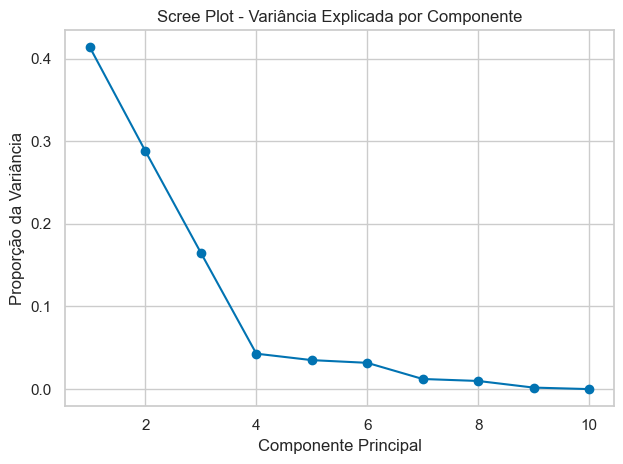

PC1: 41.34%
PC2: 28.80%
PC3: 16.50%
PC4: 4.29%
PC5: 3.51%
PC6: 3.18%
PC7: 1.22%
PC8: 0.98%
PC9: 0.18%
PC10: 0.00%


In [21]:
# 1️⃣ Aplica o preprocessador (padronização nas numéricas, passthrough nas binárias)
X_padronizado = preprocessador.fit_transform(X)

# 2️⃣ Aplica PCA com todos os componentes (sem limitar n_components ainda)
pca_full = PCA()
pca_full.fit(X_padronizado)

# 3️⃣ Scree Plot para visualizar variância explicada por componente principal
plt.plot(
    range(1, len(pca_full.explained_variance_ratio_) + 1),
    pca_full.explained_variance_ratio_,
    marker='o'
)
plt.title('Scree Plot - Variância Explicada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Proporção da Variância')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4️⃣ Mostrar numericamente a variância explicada por cada componente
for i, v in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {v:.2%}")

## 6.2 Aplicação do PCA (2 componentes)

Com base no scree plot anterior, aplicamos o PCA usando **dois componentes principais**.  
Esses dois eixos (PC1 e PC2) agora representam as novas dimensões mais relevantes dos dados.

Esses valores serão usados nos modelos com PCA, tanto para regressão quanto para classificação.

# 🔽 Etapa 22 — Aplicação do PCA com 2 Componentes e Criação do DataFrame Resultante

Nesta etapa:

- Aplicamos o PCA para reduzir a dimensionalidade para 2 componentes principais.
- Criamos um novo DataFrame `df_PCA` contendo os dois componentes principais, além das variáveis alvo `produtividade` e `safra` para facilitar análises posteriores, como visualizações ou modelagem.

In [22]:
# Aplica PCA para extrair 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_padronizado)

# Cria DataFrame com os componentes principais
df_PCA = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X.index)

# Adiciona as variáveis alvo ao DataFrame PCA
df_PCA['produtividade'] = df['produtividade']
df_PCA['safra'] = df['safra']


## 6.3 Visualização 2D dos componentes principais

Aqui, projetamos os dados no plano formado pelos dois primeiros componentes principais (`PC1` × `PC2`).  
Cada ponto representa um ano, e a cor indica a classe da safra (baixa, média ou alta).

Isso nos ajuda a observar:

- Agrupamentos visuais por tipo de safra
- Separabilidade das classes no novo espaço dimensional
- Se PCA pode ajudar os modelos a generalizar melhor

# 📈 Etapa 23 — Gráfico de Dispersão dos Componentes Principais do PCA

Nesta etapa, visualizamos os dois componentes principais extraídos pelo PCA em um gráfico de dispersão, onde os pontos são coloridos conforme a variável categórica `safra`. 

Isso ajuda a entender se as safras se distribuem de forma diferenciada nos componentes principais, indicando possíveis agrupamentos ou padrões.

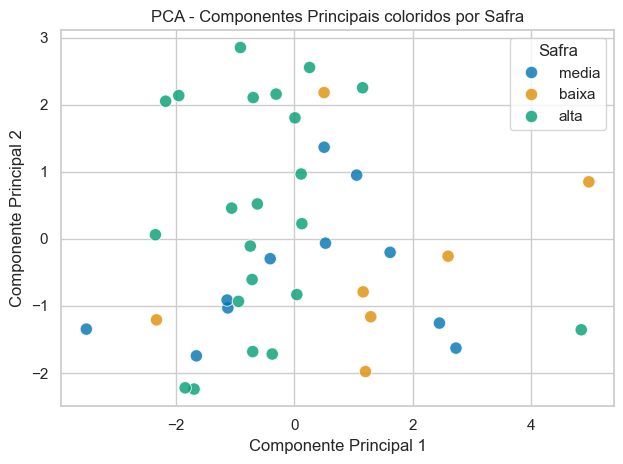

In [23]:
# Cria um scatterplot dos componentes principais PC1 e PC2 do PCA
# Cada ponto é colorido pela variável 'safra', facilitando a visualização por grupo
sns.scatterplot(data=df_PCA, x='PC1', y='PC2', hue='safra', s=80, alpha=0.8)

# Define título do gráfico
plt.title('PCA - Componentes Principais coloridos por Safra')

# Define o rótulo do eixo x
plt.xlabel('Componente Principal 1')

# Define o rótulo do eixo y
plt.ylabel('Componente Principal 2')

# Exibe legenda com o título 'Safra'
plt.legend(title='Safra')

# Ajusta o layout para evitar cortes no gráfico
plt.tight_layout()

# Mostra o gráfico na tela
plt.show()

# 7. Previsão da Produtividade — Regressão Linear

Nesta etapa, vamos construir modelos de regressão linear para prever a produtividade da safra com base em variáveis climáticas e sazonais.

Utilizaremos dois cenários:

1. **Modelos com as variáveis originais** (sem redução de dimensionalidade)
2. **Modelos com os componentes principais** obtidos via PCA

Em ambos os cenários, aplicaremos:

- Regressão Linear Simples
- Regressão com Regularização L² (Ridge)

Ao final, faremos uma comparação dos modelos com base em métricas, visualizações e interpretação da função de custo.

## 7.1 Modelos com variáveis originais (sem PCA)

Neste primeiro cenário, utilizamos diretamente as variáveis originais do dataset para prever a produtividade.

Usaremos:

- Um modelo de Regressão Linear tradicional
- Um modelo regularizado com **Ridge**, que aplica penalização L² para reduzir o sobreajuste

# 📦 Etapa 24 — Importação de Modelos, Pipeline e Métricas de Avaliação

Nesta etapa, importamos:

- Modelos de regressão linear e Ridge (regressão regularizada),
- Função para criar pipelines,
- Métricas para avaliar o desempenho do modelo, como erro quadrático médio (MSE) e coeficiente de determinação (R²).

In [24]:
# Importa modelos de regressão Linear e Ridge (regularizada)
from sklearn.linear_model import LinearRegression, Ridge

# Importa função para criar pipeline de processamento e modelagem
from sklearn.pipeline import make_pipeline

# Importa métricas para avaliação do modelo
from sklearn.metrics import mean_squared_error, r2_score

### 7.1.1 Regressão Linear Simples

Treinamos um modelo de regressão linear usando o pipeline criado anteriormente, que já inclui a padronização dos dados numéricos.

Esse modelo tenta ajustar uma função linear para prever a produtividade com base nas variáveis climáticas e sazonais.

# 🏗️ Etapa 25 — Construção, Treinamento e Avaliação do Modelo de Regressão Linear

Nesta etapa, construímos uma pipeline que integra o pré-processamento dos dados com o modelo de regressão linear, treinamos o modelo com os dados de treino, realizamos previsões no conjunto de teste e avaliamos o desempenho usando as métricas RMSE e R².

In [25]:
# Cria uma pipeline que aplica o pré-processador e depois o modelo de regressão linear
pipeline_original = make_pipeline(preprocessador, LinearRegression())

# Treina o modelo usando os dados de treino (X_train e y_train)
pipeline_original.fit(X_train, y_train)

# Realiza previsões no conjunto de teste
y_pred_orig = pipeline_original.predict(X_test)

# Calcula o erro quadrático médio (MSE) entre valores reais e previstos
mse_orig = mean_squared_error(y_test, y_pred_orig)

# Calcula a raiz do erro quadrático médio (RMSE), métrica mais interpretável
rmse_orig = mse_orig ** 0.5

# Calcula o coeficiente de determinação (R²) para avaliar o ajuste do modelo
r2_orig = r2_score(y_test, y_pred_orig)

# Exibe as métricas de desempenho do modelo
print(f"[Regressão linear] RMSE: {rmse_orig:.2f}  |  R²: {r2_orig:.2%}")


[Regressão linear] RMSE: 71.57  |  R²: -857.97%


### 7.1.2 Regressão Linear com Regularização (Ridge)

### 7.1.2 Regressão Linear com Regularização (Ridge)

Aplicamos agora a regularização L² com o modelo `Ridge`.  
Esse tipo de penalização ajuda a reduzir o sobreajuste, especialmente em datasets com alta variância ou multicolinearidade.

A força da penalização é controlada por um hiperparâmetro $\lambda$ (alpha).

# 🏗️ Etapa 26 — Pipeline com Regressão Ridge (Regularização L2)

Nesta etapa, construímos uma pipeline que utiliza o modelo Ridge, que aplica regularização L2 para controlar a complexidade do modelo e evitar overfitting. Definimos o parâmetro de regularização lambda (alpha), treinamos o modelo, realizamos previsões e avaliamos o desempenho com RMSE e R².

In [26]:
# Define o parâmetro de regularização lambda (alpha) para Ridge
lambda_regressao = 1  # valor fixo, mas pode ser testado com vários valores diferentes

# Cria pipeline com pré-processador e modelo Ridge usando o alpha definido
pipeline_ridge = make_pipeline(preprocessador, Ridge(alpha=lambda_regressao))

# Treina o modelo Ridge com os dados de treino
pipeline_ridge.fit(X_train, y_train)

# Realiza previsões com o modelo treinado no conjunto de teste
y_pred_ridge = pipeline_ridge.predict(X_test)

# Calcula o erro quadrático médio (MSE) das previsões
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calcula a raiz do erro quadrático médio (RMSE)
rmse_ridge = mse_ridge ** 0.5

# Calcula o coeficiente de determinação (R²) para avaliação do modelo
r2_ridge = r2_score(y_test, y_pred_ridge)

# Imprime as métricas de desempenho do modelo Ridge com o parâmetro alpha
print(f"[Regularização Ridge (L²) | λ = {lambda_regressao}] RMSE: {rmse_ridge:.2f}  |  R²: {r2_ridge:.2%}")

[Regularização Ridge (L²) | λ = 1] RMSE: 68.30  |  R²: -772.31%


## 7.2 Modelos com componentes principais (PCA)

## 7.2 Modelos com componentes principais (PCA)

Neste segundo cenário, utilizamos os dois primeiros componentes principais (PC1 e PC2) obtidos com PCA para treinar os modelos.

O objetivo é verificar se a projeção em um espaço com menos dimensões melhora a capacidade do modelo de generalizar.

### 7.2.1 Regressão Linear Simples sobre PCA

### 7.2.1 Regressão Linear Simples sobre PCA

Aqui treinamos o modelo linear diretamente sobre os dois componentes principais (`PC1` e `PC2`).

# 🏗️ Etapa 27 — Regressão Linear Usando Componentes Principais (PCA)

Nesta etapa, utilizamos os dois primeiros componentes principais extraídos pelo PCA como variáveis explicativas para treinar um modelo de regressão linear. Fazemos a divisão temporal dos dados, treinamos o modelo, realizamos previsões e avaliamos seu desempenho com RMSE e R².

In [27]:
# Define as variáveis explicativas como os dois primeiros componentes principais do PCA
X_pca = df_PCA[['PC1', 'PC2']]

# Define a variável alvo como a produtividade
y_pca = df_PCA['produtividade']

# Divide os dados em treino e teste, mantendo a ordem temporal (sem embaralhar)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y_pca, test_size=0.2, shuffle=False
)

# Cria e treina o modelo de regressão linear simples com os componentes principais
modelo_pca = LinearRegression()
modelo_pca.fit(X_pca_train, y_pca_train)

# Realiza previsões no conjunto de teste
y_pred_pca = modelo_pca.predict(X_pca_test)

# Calcula a raiz do erro quadrático médio (RMSE) das previsões
rmse_pca = mean_squared_error(y_pca_test, y_pred_pca) ** 0.5

# Calcula o coeficiente de determinação (R²) do modelo
r2_pca = r2_score(y_pca_test, y_pred_pca)

# Imprime as métricas de avaliação do modelo usando PCA
print(f"[PCA + Regressão linear] RMSE: {rmse_pca:.2f}  |  R²: {r2_pca:.2%}")

[PCA + Regressão linear] RMSE: 43.28  |  R²: -250.26%


### 7.2.2 Regressão Linear com Regularização (Ridge) sobre PCA

### 7.2.2 Regressão Linear com Regularização (Ridge) sobre PCA

Aplicamos o modelo `Ridge` sobre o espaço PCA, combinando redução de dimensionalidade com regularização para minimizar o erro e o sobreajuste.

# 🏗️ Etapa 28 — Modelo Ridge Aplicado sobre Componentes Principais (PCA)

Nesta etapa, aplicamos a regularização Ridge (L2) a um modelo de regressão linear que utiliza os componentes principais extraídos pelo PCA. O parâmetro de regularização lambda (alpha) é definido, o modelo é treinado, realiza-se previsão e avalia-se o desempenho com RMSE e R².

In [28]:
# Define o parâmetro de regularização lambda (alpha) para Ridge
lambda_regressao = 1  # pode ser ajustado para testar diferentes valores

# Cria e treina o modelo Ridge usando os componentes principais de treino
modelo_pca_ridge = Ridge(alpha=lambda_regressao)
modelo_pca_ridge.fit(X_pca_train, y_pca_train)

# Realiza previsões com o modelo treinado no conjunto de teste
y_pred_pca_ridge = modelo_pca_ridge.predict(X_pca_test)

# Calcula a raiz do erro quadrático médio (RMSE) das previsões
rmse_pca_ridge = mean_squared_error(y_pca_test, y_pred_pca_ridge) ** 0.5

# Calcula o coeficiente de determinação (R²) para avaliar o modelo
r2_pca_ridge = r2_score(y_pca_test, y_pred_pca_ridge)

# Exibe as métricas do modelo Ridge com PCA
print(f"[PCA + Regularização Ridge (L²) | λ = {lambda_regressao}] RMSE: {rmse_pca_ridge:.2f}  |  R²: {r2_pca_ridge:.2%}")

[PCA + Regularização Ridge (L²) | λ = 1] RMSE: 42.98  |  R²: -245.38%


## 7.3 Comparação dos modelos

Com os modelos treinados, agora comparamos seu desempenho por diferentes perspectivas:

- Tabela com métricas (RMSE e R²)
- Curvas de previsão vs. variáveis explicativas
- Gráficos da função de custo (1D e 2D)
- Análise gráfica dos resíduos

### 7.3.1 Tabela Comparativa — Regressão regularizada com e sem PCA

Aqui comparamos os resultados obtidos pelos quatro modelos testados:

- Regressão Linear Simples
- Regressão Ridge
- Regressão com PCA
- Regressão com PCA + Ridge

As métricas utilizadas são:

- **RMSE** (Root Mean Squared Error): mede o erro médio entre as previsões e os valores reais.
- **R²** (coeficiente de determinação): indica quanto da variância da variável-alvo é explicada pelo modelo.

Quanto menor o RMSE e maior o R², melhor o modelo.

| λ (Ridge) | RMSE sem PCA | R² sem PCA    | RMSE com PCA | R² com PCA    |
|-----------|--------------|---------------|---------------|---------------|
| 0         | 71.57        | –857.97%      | 43.28         | –250.26%      |
| 0.1       | 71.19        | –847.87%      | 43.25         | –249.76%      |
| 1         | 68.30        | –772.31%      | 42.98         | –245.38%      |
| 10        | 54.97        | –465.14%      | 40.61         | –208.48%      |
| 100       | 34.91        | –127.95%      | 31.20         | –82.07%       |
| 1000      | 26.38        | –30.09%       | 25.97         | –26.16%       |
| 10000     | 25.61        | –22.67%       | 25.57         | –22.30%       |
| 30000     | 25.56        | –22.21%       | 25.55         | –22.09%       |
| 100000    | 25.55        | –22.06%       | 25.54         | –22.02%       |
| 300000    | 25.54        | –22.01%       | 25.54         | –22.00%       |
| 1000000   | 25.54        | –22.00%       | 25.54         | –21.99%       |


# 📊 Etapa 29 — Comparação do RMSE em Função do Parâmetro de Regularização λ (Ridge) com e sem PCA

Nesta etapa, plotamos a comparação do desempenho dos modelos Ridge aplicados diretamente nos dados originais e após a transformação PCA. Utilizamos diferentes valores de λ (alpha) para regularização e comparamos os RMSE para avaliar o impacto da PCA na regressão regularizada.

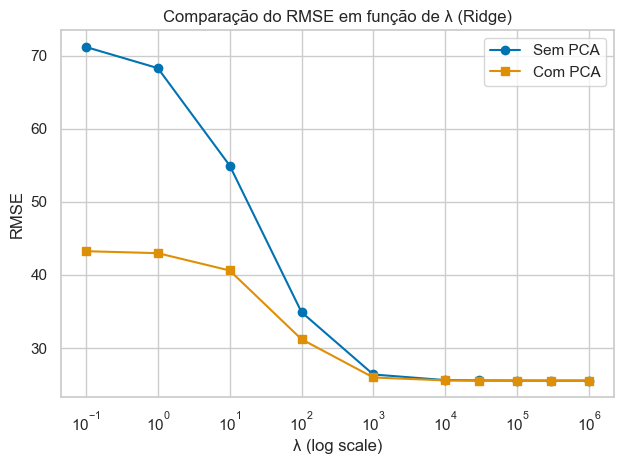

In [29]:
# Valores simulados para diferentes parâmetros λ (alpha) de regularização Ridge
lambdas = [0.1, 1, 10, 100, 1000, 10000, 30000, 100000, 300000, 1000000]

# RMSE correspondentes para o modelo Ridge sem uso de PCA
rmse_sem_pca = [71.19, 68.30, 54.97, 34.91, 26.38, 25.61, 25.56, 25.55, 25.54, 25.54]

# RMSE correspondentes para o modelo Ridge aplicado após PCA
rmse_com_pca = [43.25, 42.98, 40.61, 31.20, 25.97, 25.57, 25.55, 25.54, 25.54, 25.54]

# Plotagem dos RMSE em função de λ na escala logarítmica
plt.plot(lambdas, rmse_sem_pca, marker='o', label='Sem PCA')
plt.plot(lambdas, rmse_com_pca, marker='s', label='Com PCA')

# Ajusta o eixo x para escala logarítmica, facilitando a visualização da variação em ordens de grandeza
plt.xscale('log')

# Define os rótulos dos eixos e título do gráfico
plt.xlabel("λ (log scale)")
plt.ylabel("RMSE")
plt.title("Comparação do RMSE em função de λ (Ridge)")

# Ativa grade e legenda para melhor interpretação do gráfico
plt.grid(True)
plt.legend()

# Ajusta layout para evitar sobreposição de elementos gráficos
plt.tight_layout()

# Exibe o gráfico final
plt.show()

# 📈 Etapa 30 — Comparação do Coeficiente de Determinação R² em Função de λ (Ridge) com e sem PCA

Aqui analisamos o comportamento do R² para modelos Ridge com diferentes valores de λ, comparando o desempenho com os dados originais e após aplicação da PCA. O gráfico permite avaliar a qualidade do ajuste do modelo em função da regularização.

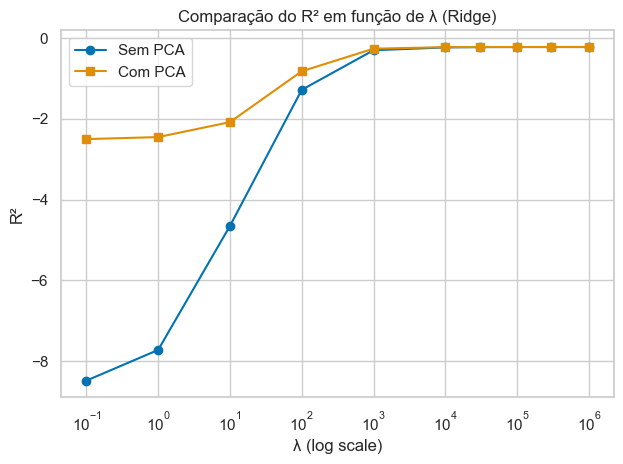

In [30]:
# Valores simulados de R² para diferentes parâmetros λ no modelo Ridge sem PCA
r2_sem_pca = [-8.48, -7.72, -4.65, -1.28, -0.30, -0.23, -0.2221, -0.2206, -0.2201, -0.2200]

# Valores simulados de R² para diferentes parâmetros λ no modelo Ridge com PCA
r2_com_pca = [-2.50, -2.45, -2.08, -0.82, -0.2616, -0.2230, -0.2209, -0.2202, -0.2200, -0.2199]

# Plotagem do R² em função de λ na escala logarítmica
plt.plot(lambdas, r2_sem_pca, marker='o', label='Sem PCA')
plt.plot(lambdas, r2_com_pca, marker='s', label='Com PCA')

# Define a escala logarítmica para o eixo x
plt.xscale('log')

# Define os rótulos e título do gráfico
plt.xlabel("λ (log scale)")
plt.ylabel("R²")
plt.title("Comparação do R² em função de λ (Ridge)")

# Exibe grade e legenda
plt.grid(True)
plt.legend()

# Ajusta layout para melhor visualização
plt.tight_layout()

# Mostra o gráfico
plt.show()

### 7.3.2 Relação entre variáveis e produtividade

Aqui comparamos os valores reais de produtividade com as previsões feitas por cada modelo, para cada variável explicativa.

Para cada variável (ex: temperatura, umidade, chuva), os gráficos mostram:

- Os pontos reais (em vermelho)
- A curva prevista por cada modelo:
  - Linear sem PCA
  - Ridge sem PCA
  - Linear com PCA
  - Ridge com PCA

Também incluímos gráficos para os dois componentes principais (`PC1` e `PC2`), que são combinações das variáveis originais.

Essa visualização ajuda a entender:

- O tipo de relação entre as variáveis e a produtividade
- O comportamento qualitativo dos modelos
- Se o PCA gerou representações mais alinhadas com a saída

# 📊 Etapa 31 — Função para Plotar Comparação de Modelos para uma Variável Específica

Esta função gera um gráfico comparando as previsões de diferentes modelos (regressão linear, Ridge, PCA + linear e PCA + Ridge) para uma variável de entrada, sobrepondo-as aos dados reais. Permite visualizar como cada modelo responde à variação de uma única característica, mantendo as demais constantes na média.

In [31]:
def plot_modelos_para_variavel(x_var, X, y, scaler, pca_model, modelo_linear, modelo_ridge, modelo_pca, modelo_pca_ridge):
    # Obtém o índice da variável de interesse no dataframe
    x_index = X.columns.get_loc(x_var)
    
    # Cria 100 valores espaçados uniformemente entre o mínimo e máximo da variável
    x_vals = np.linspace(X[x_var].min(), X[x_var].max(), 100)
    
    # Calcula a média das outras variáveis para manter constantes
    X_mean = X.mean().to_numpy()

    # Cria matriz de entrada repetindo a média e substituindo a coluna da variável por x_vals
    X_input = np.tile(X_mean, (100, 1))
    X_input[:, x_index] = x_vals
    
    # Converte matriz de entrada em DataFrame para facilitar transformação
    X_input_df = pd.DataFrame(X_input, columns=X.columns)
    
    # Aplica padronização usando o scaler fornecido
    X_input_scaled = scaler.transform(X_input_df)
    
    # Aplica transformação PCA nos dados padronizados
    X_input_pca = pca_model.transform(X_input_scaled)

    # Gera as previsões dos modelos para os dados de entrada
    y_linear = modelo_linear.predict(X_input_scaled)
    y_ridge = modelo_ridge.predict(X_input_scaled)
    y_pca = modelo_pca.predict(X_input_pca)
    y_pca_ridge = modelo_pca_ridge.predict(X_input_pca)

    # Configura a figura para o gráfico
    plt.figure(figsize=(10, 6))
    
    # Plota os dados reais como pontos vermelhos com borda preta
    sns.scatterplot(x=X[x_var], y=y, color='red', label='Dados reais', s=50, edgecolor='black')
    
    # Plota as curvas preditas pelos modelos com diferentes estilos e cores
    plt.plot(x_vals, y_linear, label='Linear', linestyle='-', color='blue')
    plt.plot(x_vals, y_ridge, label='Ridge (λ=1.000.000)', linestyle='--', color='orange')
    plt.plot(x_vals, y_pca, label='PCA + Linear', linestyle='-.', color='green')
    plt.plot(x_vals, y_pca_ridge, label='PCA + Ridge (λ=100.000)', linestyle=':', color='purple')
    
    # Configura títulos e rótulos dos eixos
    plt.xlabel(x_var)
    plt.ylabel('Produtividade (kg/ha)')
    plt.title(f'Comparação de modelos — {x_var}')
    
    # Exibe legenda, grade e ajusta layout
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 🔄 Etapa 32 — Reconstrução dos Dados, Padronização, PCA e Treinamento dos Modelos Separadamente

Nesta etapa:

1. Reconstruímos as variáveis independentes (X) e a variável alvo (y) para garantir a seleção correta das colunas.
2. Padronizamos as variáveis numéricas para que todas tenham média zero e desvio padrão um, preparando os dados para PCA e modelos.
3. Aplicamos PCA para reduzir a dimensionalidade a 2 componentes principais, facilitando visualização e modelagem.
4. Treinamos quatro modelos distintos:
   - Regressão Linear simples nos dados padronizados,
   - Regressão Ridge com forte regularização nos dados padronizados,
   - Regressão Linear nos dados reduzidos pelo PCA,
   - Regressão Ridge com regularização nos dados PCA.

In [32]:
# 1. Reconstrução de X e y
X = df[
    [
        'chuva_flor', 'chuva_colheita', 'chuva_total',
        'anomalia_flor', 'temp_flor', 'umid_flor', 'chuva_relativa'
    ]
]
y = df['produtividade']

# 2. Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X_scaled)
# Converte o array PCA em DataFrame com nomes das componentes
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df.index)
df[['PC1', 'PC2']] = df_pca

# 4. Modelos treinados separadamente
modelo_linear = LinearRegression().fit(X_scaled, y)       # Regressão Linear nos dados padronizados
modelo_ridge = Ridge(alpha=1e6).fit(X_scaled, y)          # Ridge com alta regularização nos dados padronizados
modelo_pca = LinearRegression().fit(X_pca, y)             # Regressão Linear nos dados PCA
modelo_pca_ridge = Ridge(alpha=1e5).fit(X_pca, y)         # Ridge nos dados PCA com regularização


# 📊 Etapa 33 — Visualização da Comparação dos Modelos para a Variável 'temp_flor'

Nesta etapa, utilizamos a função `plot_modelos_para_variavel` para comparar visualmente as previsões dos quatro modelos (Linear, Ridge, PCA+Linear, PCA+Ridge) em relação à variável 'temp_flor'. O gráfico exibe:

- Pontos vermelhos representando os dados reais,
- Curvas de previsão para cada modelo

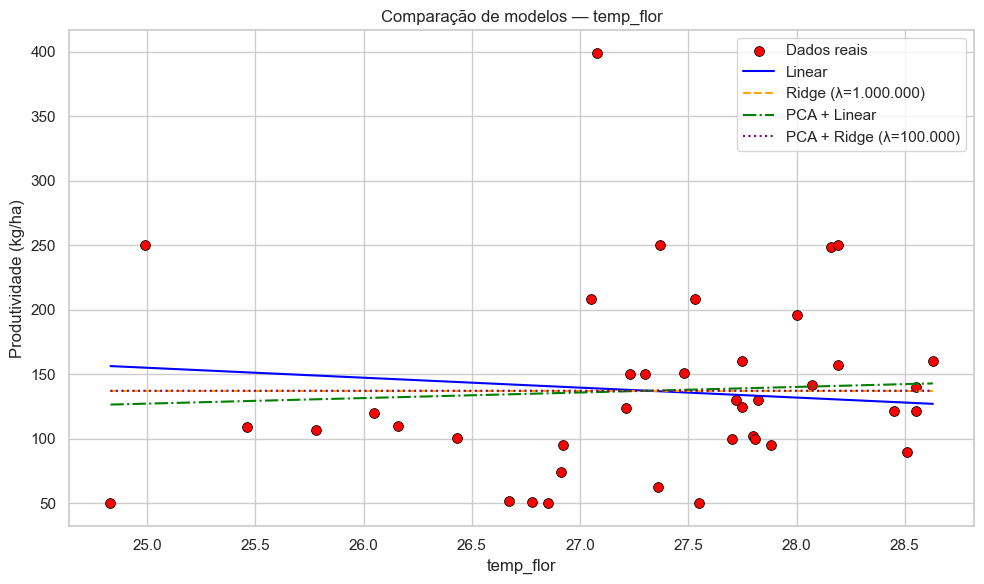

In [33]:
plot_modelos_para_variavel(
    'temp_flor',    # variável independente a ser analisada
    X,              # dados originais das variáveis independentes
    y,              # variável alvo
    scaler,         # objeto para padronização dos dados
    pca_model,      # modelo PCA ajustado para transformação dos dados
    modelo_linear,  # modelo de regressão linear treinado nos dados padronizados
    modelo_ridge,   # modelo Ridge treinado nos dados padronizados
    modelo_pca,     # modelo linear treinado nos dados PCA
    modelo_pca_ridge # modelo Ridge treinado nos dados PCA
)

---

#### 👀 Explorando todas as variáveis

A seguir, apresentamos a comparação dos modelos para **todas as variáveis explicativas** do projeto.

Você pode navegar pelos gráficos abaixo e observar:

- Como cada modelo tenta ajustar a relação entre a variável e a produtividade
- Qual curva parece mais adequada
- Se algum modelo apresenta padrão de sub ou superestimação

> 🧠 Essa parte pode ser densa — sinta-se à vontade para analisar com calma ou pular para a próxima subseção após alguns exemplos.

# 📦 Etapa 34 — Importação do Módulo para Exibir Markdown no Jupyter Notebook

Nesta etapa, importamos do módulo `IPython.display` a função `Markdown` e o método `display`, que permitem renderizar textos em formato Markdown diretamente nas células do Jupyter Notebook. Isso facilita a documentação interativa e a apresentação de resultados formatados.

In [34]:
from IPython.display import Markdown, display  # Importa funções para exibir texto em Markdown no notebook

# 📦 Etapa 35 — Plotagem Comparativa dos Modelos para Todas as Variáveis Explicativas

Nesta etapa, utilizamos a função `plot_modelos_para_variavel` para visualizar a comparação entre os diferentes modelos (linear, Ridge, PCA + linear, PCA + Ridge) em relação a cada variável explicativa do conjunto de dados. 

O loop itera sobre todas as variáveis, gerando gráficos que mostram como cada modelo prevê a produtividade conforme variações individuais de cada variável, mantendo as demais constantes na média. Após cada gráfico, é exibido um título em Markdown para indicar a passagem para a próxima variável.

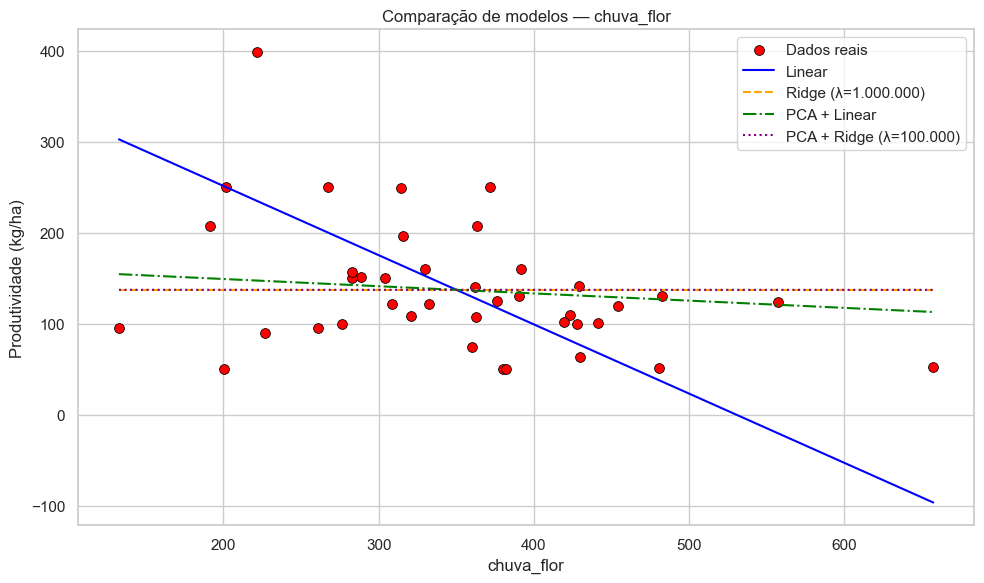

### ⬇️ Próxima variável

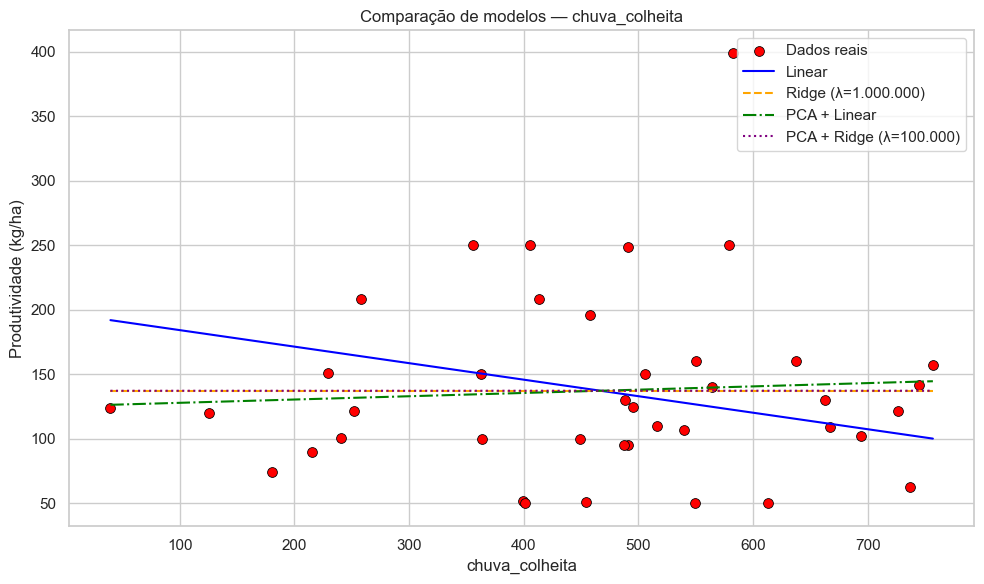

### ⬇️ Próxima variável

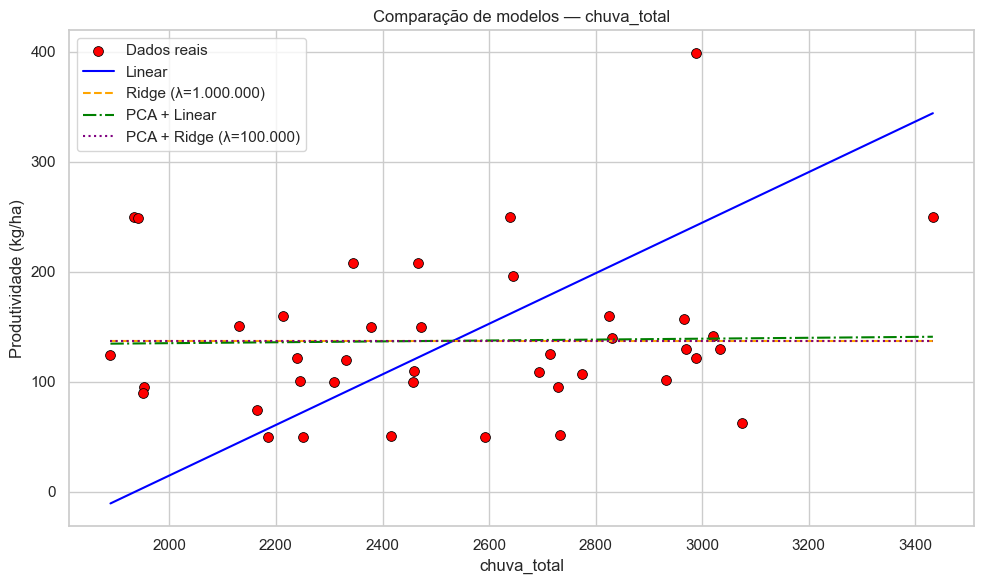

### ⬇️ Próxima variável

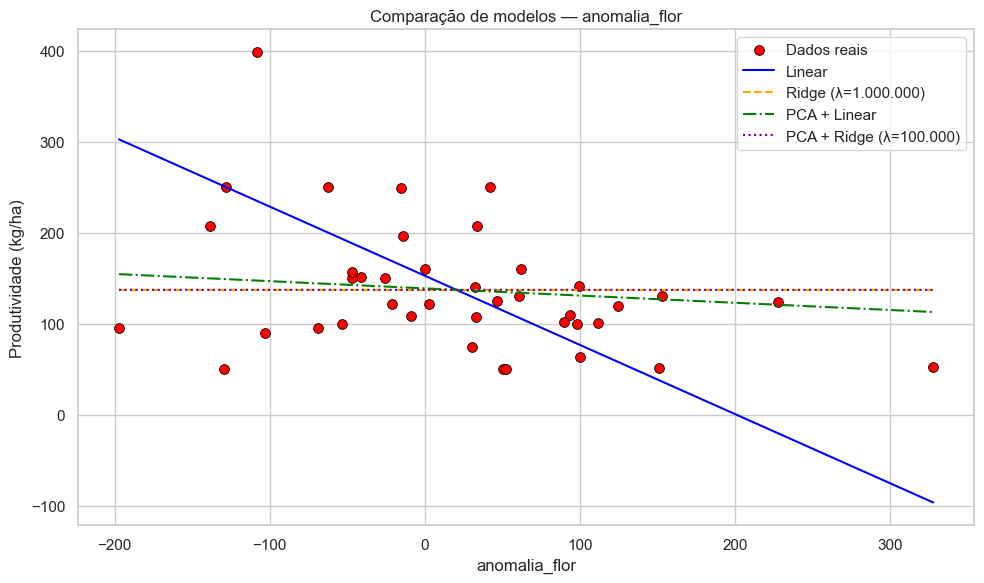

### ⬇️ Próxima variável

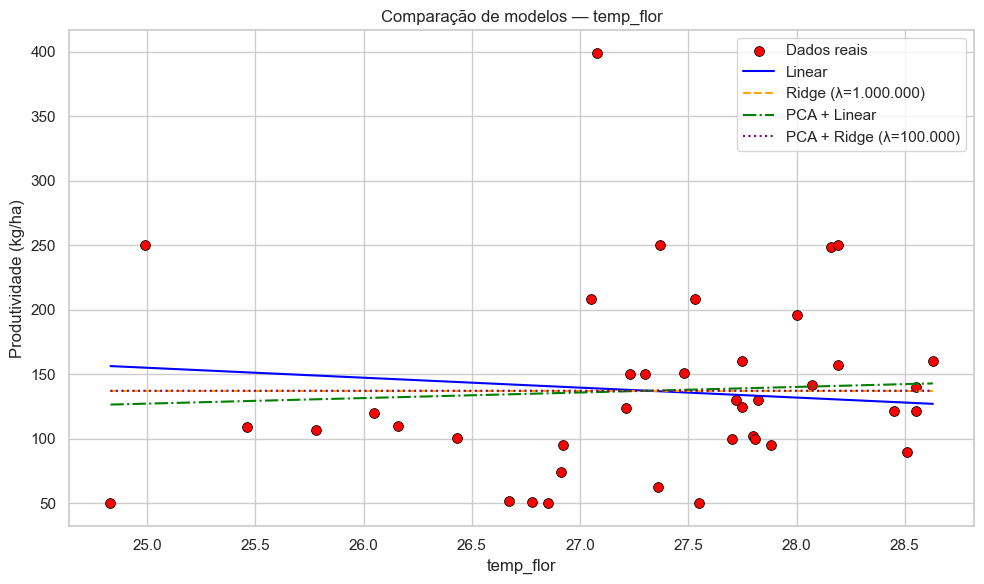

### ⬇️ Próxima variável

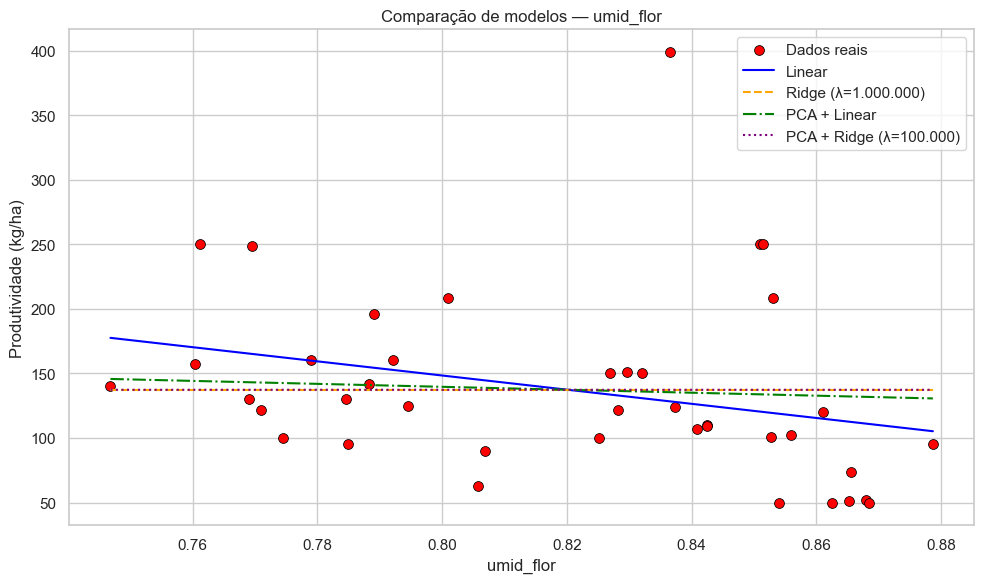

### ⬇️ Próxima variável

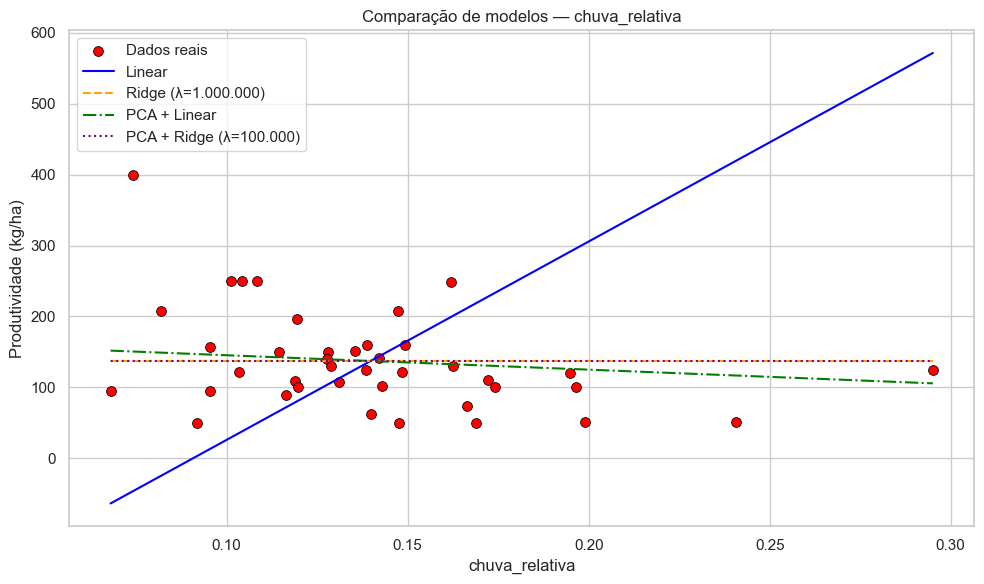

### ⬇️ Próxima variável

In [35]:
# Lista das variáveis explicativas a serem avaliadas
variaveis_explicativas = [
    'chuva_flor', 'chuva_colheita', 'chuva_total',
    'anomalia_flor', 'temp_flor', 'umid_flor', 'chuva_relativa'
]

# Loop para plotar a comparação dos modelos para cada variável
for var in variaveis_explicativas:
    plot_modelos_para_variavel(
        var,
        X,
        y,
        scaler,
        pca_model,
        modelo_linear,
        modelo_ridge,
        modelo_pca,
        modelo_pca_ridge
    )
    display(Markdown("### ⬇️ Próxima variável"))  # Exibe título em markdown para separação visual no notebook

### 7.3.3 Função custo

A função de custo é uma medida de erro total do modelo — ela indica "o quão longe" estão as previsões em relação aos valores reais.

Na regressão linear, a função de custo mais comum é o **erro quadrático médio (MSE)**, também chamado de:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

---

### 🔍 O que fazemos nesta seção:

- **1D**: Visualizamos como o erro varia para um único coeficiente da regressão
- **2D**: Geramos superfícies que mostram a forma da função de custo para pares de variáveis
- **PCA**: Também plotamos a superfície da função de custo no plano `PC1 × PC2`

Esses gráficos ajudam a entender **como o modelo "procura" os melhores coeficientes**, e a natureza suave da função que ele está otimizando.

#### Curva 1D da função custo

# 📦 Etapa 36 — Função para Plotar a Função de Custo J(θ₁) para Regressão Univariada

Esta função plota a função de custo J(θ₁) para um modelo de regressão linear simples utilizando uma única variável explicativa `x_var`. 

O vetor `x` é centralizado (subtraído pela média) para eliminar a necessidade de incluir o intercepto na análise, simplificando a função de custo para variar apenas o coeficiente angular θ₁.

Para uma faixa de valores θ₁ definida em `intervalo`, calcula-se o custo médio quadrático para cada valor, gerando o gráfico da função de custo, útil para entender o comportamento do erro em relação ao coeficiente do modelo.

In [36]:
def plot_funcao_custo_1D(x_var, X, y, intervalo=(-200, 200), pontos=200):
    """
    Plota a função de custo J(θ₁) para uma regressão univariada com a variável x_var.
    """
    x = X[x_var].values
    y = y.values
    m = len(y)

    # Centraliza x para eliminar o intercepto implicitamente
    x_centralizado = x - x.mean()

    # Gera valores para θ₁ no intervalo especificado
    theta1_vals = np.linspace(intervalo[0], intervalo[1], pontos)
    
    # Calcula o custo J(θ₁) para cada θ₁
    custos = [(1 / (2 * m)) * np.sum((theta1 * x_centralizado - y) ** 2) for theta1 in theta1_vals]

    # Plotagem da função de custo
    plt.figure(figsize=(8, 5))
    plt.plot(theta1_vals, custos)
    plt.xlabel("θ₁")
    plt.ylabel("J(θ₁)")
    plt.title(f"Função de Custo - {x_var} (x centralizado)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📦 Etapa 37 — Visualização da Função de Custo para a Variável `temp_flor`

Aqui geramos o gráfico da função de custo J(θ₁) para a variável `temp_flor` do conjunto de dados. 

O gráfico ajuda a entender como o erro quadrático médio do modelo varia conforme o coeficiente angular θ₁ muda, facilitando a análise do comportamento da regressão univariada considerando essa variável.

C:\Users\adria\AppData\Local\Temp\ipykernel_145932\3752810137.py:25: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\adria\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


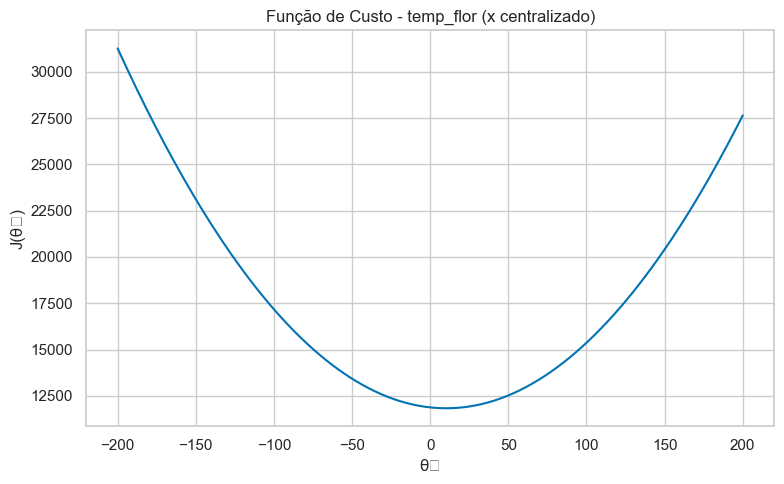

In [37]:
plot_funcao_custo_1D('temp_flor', X, y)  # executa a função para a variável temp_flor

# 📦 Etapa 38 — Plotagem das Funções de Custo para Todas as Variáveis Explicativas

Nesta etapa, geramos os gráficos da função de custo J(θ₁) para cada uma das variáveis explicativas presentes no conjunto de dados. 

Esses gráficos permitem visualizar o comportamento do erro quadrático médio em função do coeficiente θ₁ para cada variável, facilitando a análise individual da influência de cada uma na regressão univariada.

C:\Users\adria\AppData\Local\Temp\ipykernel_145932\3752810137.py:25: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()


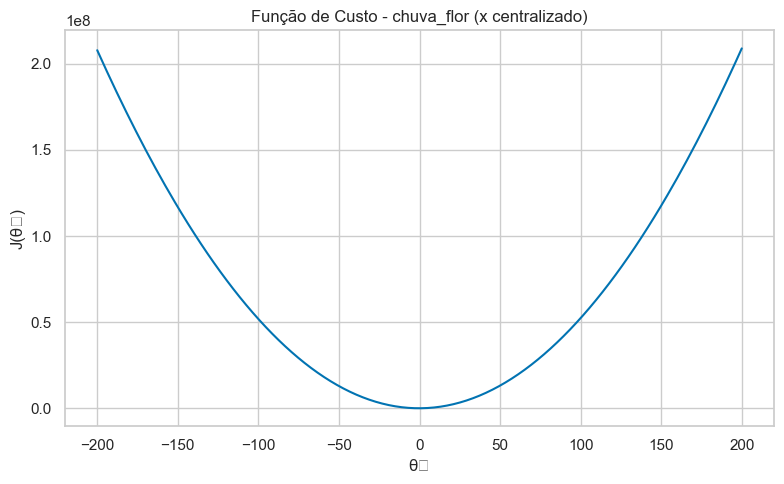

### ⬇️ Próxima função custo

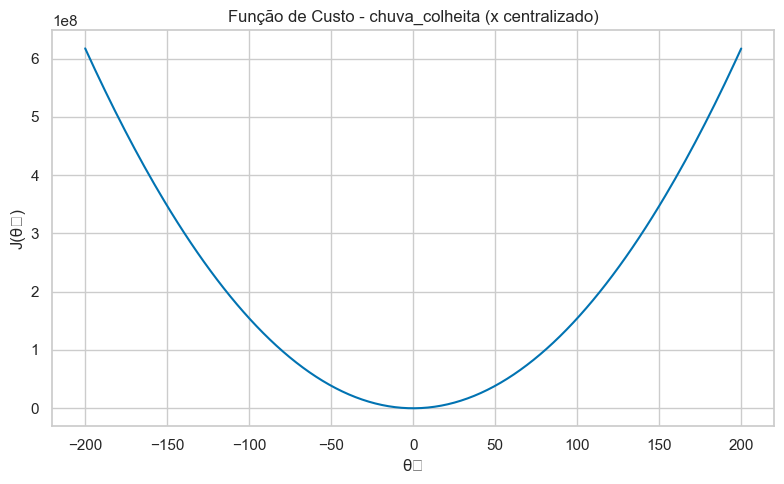

### ⬇️ Próxima função custo

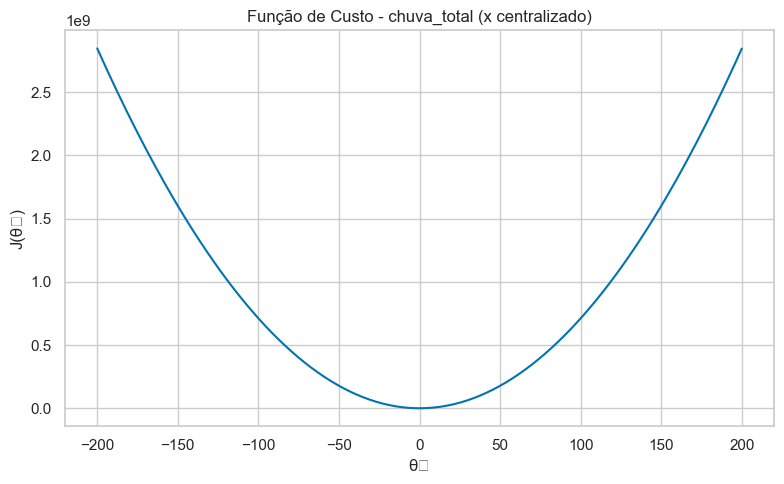

### ⬇️ Próxima função custo

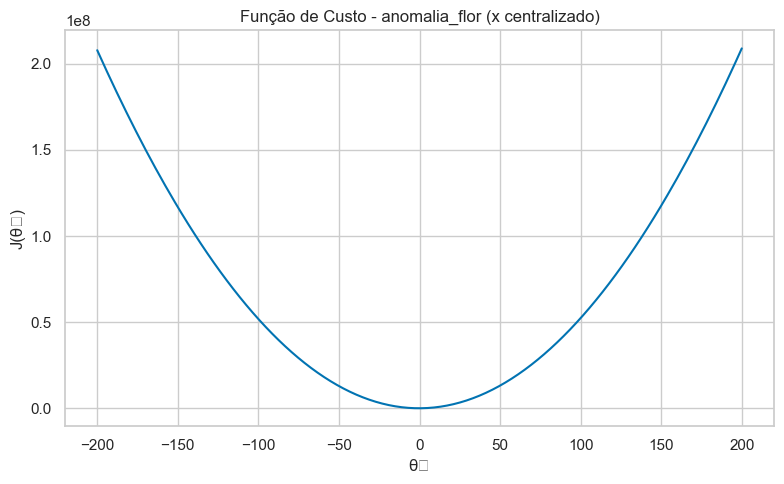

### ⬇️ Próxima função custo

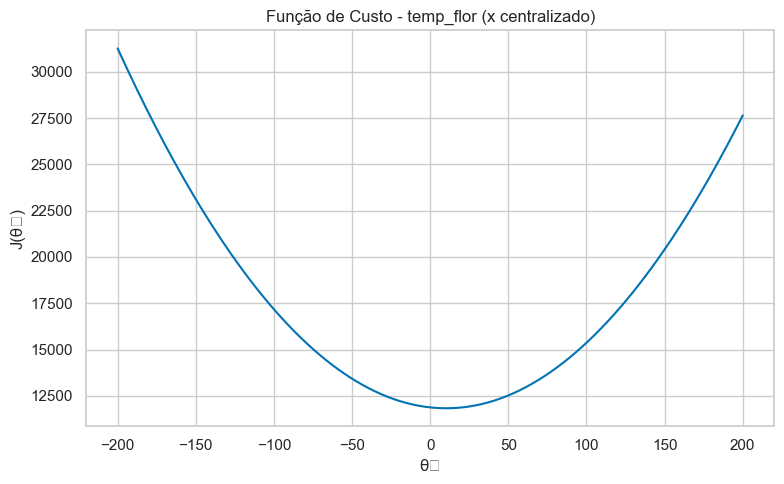

### ⬇️ Próxima função custo

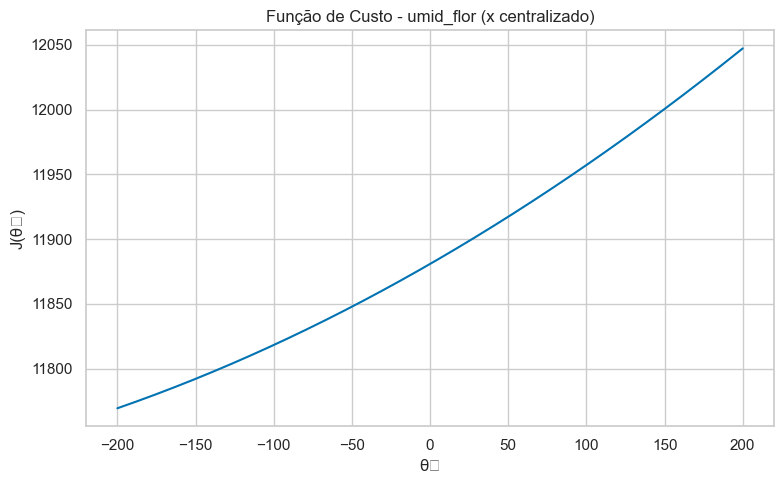

### ⬇️ Próxima função custo

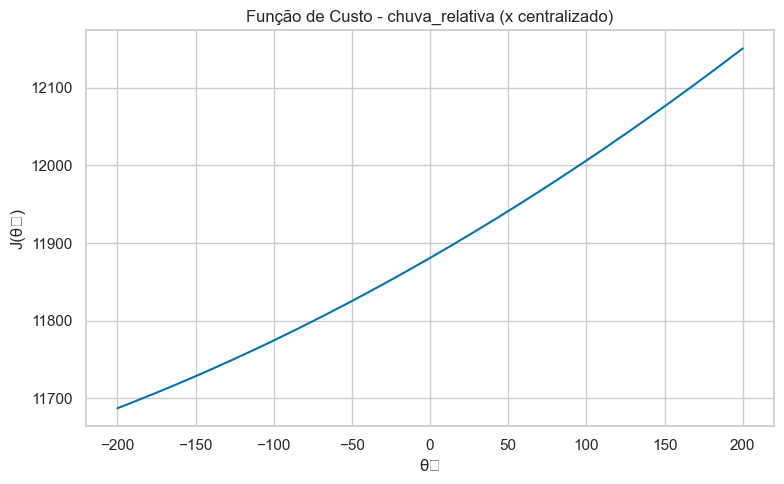

### ⬇️ Próxima função custo

In [38]:
# Lista das variáveis explicativas para as quais será plotada a função de custo
variaveis_explicativas = [
    'chuva_flor', 'chuva_colheita', 'chuva_total',
    'anomalia_flor', 'temp_flor', 'umid_flor', 'chuva_relativa'
]

# Loop para iterar sobre cada variável e gerar seu gráfico de função de custo
for var in variaveis_explicativas:
    plot_funcao_custo_1D(var, X, y)  # chama a função que plota o gráfico para a variável atual
    display(Markdown("### ⬇️ Próxima função custo"))  # separador em markdown para organizar a saída visual no notebook

#### Superfície 2D da função custo

# 📦 Etapa 39 — Importação de ferramentas para análise combinatória e gráficos 3D

Nesta etapa, importamos:

- `combinations` do módulo `itertools`, para gerar todas as combinações possíveis de variáveis, facilitando análises multivariadas.
- `Axes3D` do `mpl_toolkits.mplot3d`, que permite a criação de gráficos tridimensionais, úteis para visualizar relações entre três variáveis simultaneamente.

In [39]:
# Importa função para gerar combinações de variáveis
from itertools import combinations

# Importa módulo para gráficos 3D no matplotlib
from mpl_toolkits.mplot3d import Axes3D

# 📦 Etapa 40 — Visualização da função de custo para pares de variáveis

Nesta etapa, definimos funções para:

- Plotar a superfície da função de custo J(θ₁, θ₂) para duas variáveis, considerando θ₀ = 0 para simplificar.
- Gerar automaticamente as superfícies para todas as combinações possíveis de pares de variáveis em X, facilitando a análise conjunta do efeito de dois parâmetros na regressão.

In [40]:
def plot_funcao_custo_2D(x_vars, X, y, range_theta=(-200, 200), pontos=100):
    """
    Plota a superfície da função de custo J(θ₁, θ₂) para duas variáveis.
    """
    # Extrai os valores das duas variáveis selecionadas
    x1 = X[x_vars[0]].values
    x2 = X[x_vars[1]].values
    y = y.values
    m = len(y)

    # Matriz de entrada com intercepto (θ₀)
    X_mat = np.vstack([np.ones(m), x1, x2]).T

    # Geração de grid de valores para θ₁ e θ₂ (θ₀ fixado em zero)
    theta1_vals = np.linspace(range_theta[0], range_theta[1], pontos)
    theta2_vals = np.linspace(range_theta[0], range_theta[1], pontos)
    J_vals = np.zeros((pontos, pontos))

    # Calcula o custo J para cada par (θ₁, θ₂)
    for i in range(pontos):
        for j in range(pontos):
            theta = np.array([0, theta1_vals[i], theta2_vals[j]])  # θ₀ = 0
            h = X_mat @ theta
            J_vals[j, i] = (1 / (2 * m)) * np.sum((h - y) ** 2)

    # Cria meshgrid para θ₁ e θ₂ e plota superfície 3D da função custo
    T1, T2 = np.meshgrid(theta1_vals, theta2_vals)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T1, T2, J_vals, cmap='viridis', edgecolor='none', alpha=0.9)

    # Configurações dos eixos e título
    ax.set_xlabel(f"θ₁ ({x_vars[0]})")
    ax.set_ylabel(f"θ₂ ({x_vars[1]})")
    ax.set_zlabel("J(θ)")
    ax.set_title(f"Superfície da Função de Custo — {x_vars[0]} e {x_vars[1]}")
    fig.subplots_adjust(right=0.5)
    plt.show()

def gerar_todas_superficies_2D(X, y, intervalo=(-200, 200), pontos=100):
    """
    Gera superfícies da função de custo para todas as combinações possíveis 2 a 2 das variáveis em X.
    """
    # Gera todas as combinações possíveis de 2 variáveis entre as colunas de X
    pares_variaveis = list(combinations(X.columns, 2))
    # Itera sobre cada par para plotar a superfície de custo correspondente
    for x_pair in pares_variaveis:
        plot_funcao_custo_2D(x_pair, X, y, range_theta=intervalo, pontos=pontos)
        display(Markdown("### ⬇️ Próxima superfície"))

# 📊 Etapa 41 — Plotagem da função de custo para variáveis específicas

Nesta etapa, demonstramos como gerar o gráfico da superfície da função de custo J(θ₁, θ₂) para um par específico de variáveis explicativas, facilitando a análise detalhada do comportamento do custo para estes parâmetros.

c:\Users\adria\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


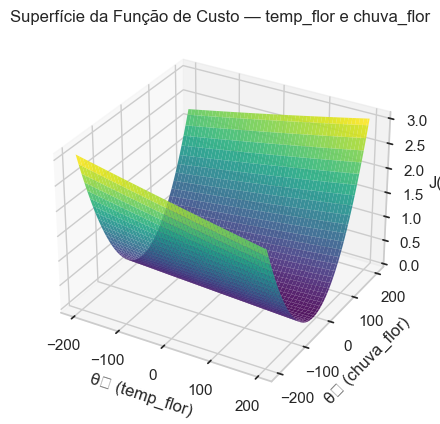

In [41]:
# Plotagem da superfície da função de custo para as variáveis 'temp_flor' e 'chuva_flor'
plot_funcao_custo_2D(['temp_flor', 'chuva_flor'], X, y)

# 📊 Etapa 42 — Geração automática de superfícies da função de custo para todas combinações 2 a 2

Aqui automatizamos a plotagem das superfícies da função de custo J(θ₁, θ₂) para todas as combinações possíveis de pares de variáveis explicativas no conjunto de dados, permitindo uma análise completa do espaço de parâmetros.

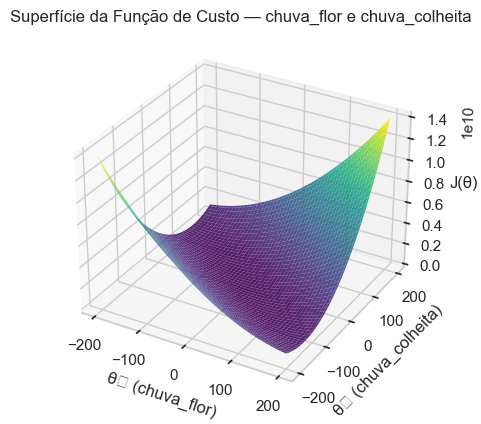

### ⬇️ Próxima superfície

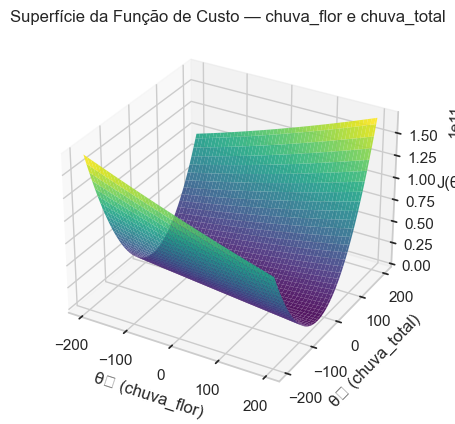

### ⬇️ Próxima superfície

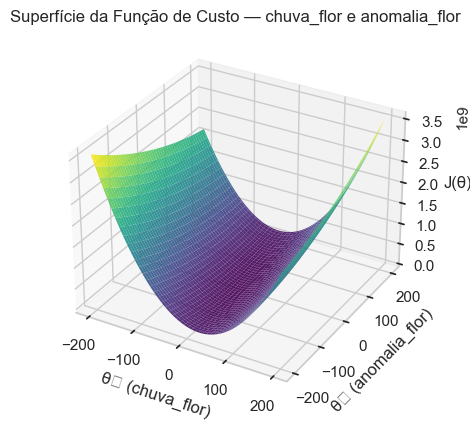

### ⬇️ Próxima superfície

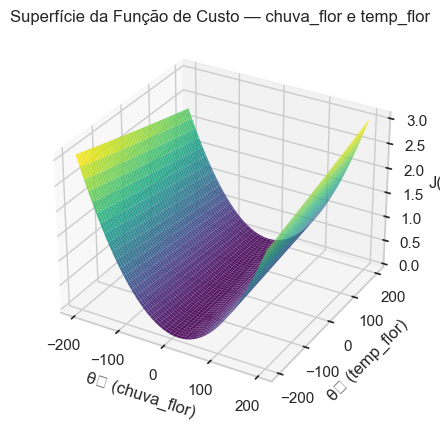

### ⬇️ Próxima superfície

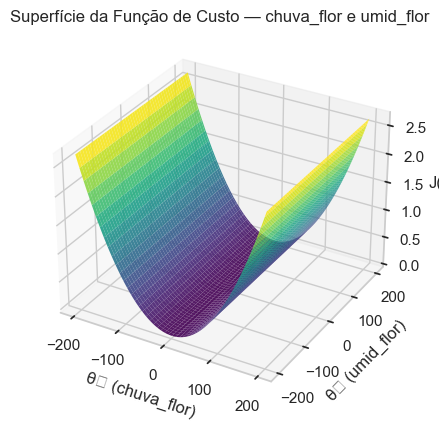

### ⬇️ Próxima superfície

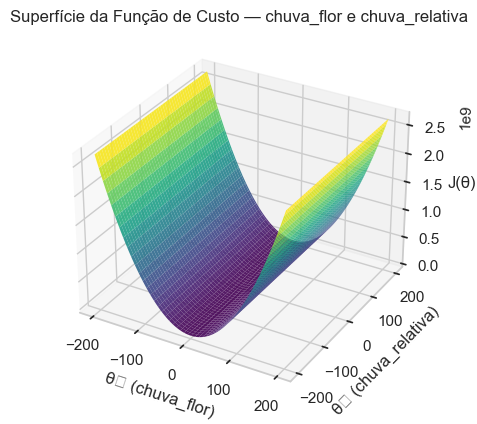

### ⬇️ Próxima superfície

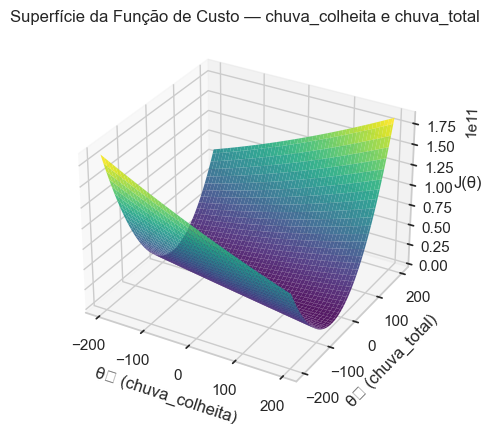

### ⬇️ Próxima superfície

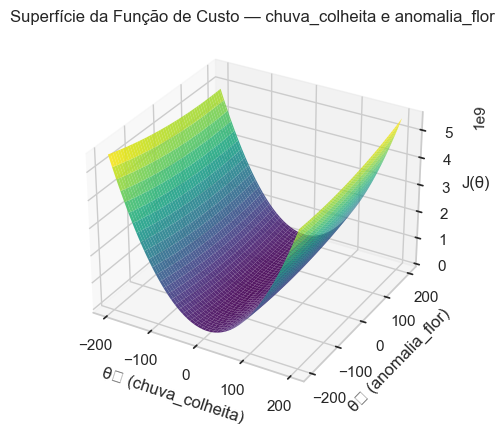

### ⬇️ Próxima superfície

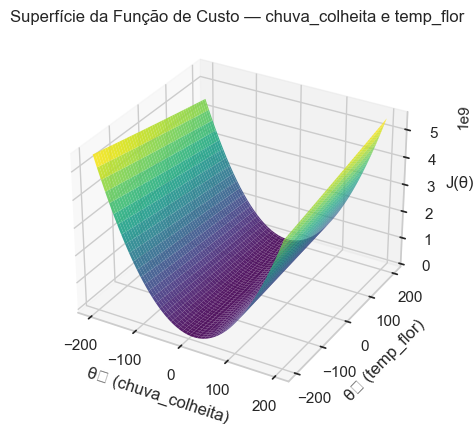

### ⬇️ Próxima superfície

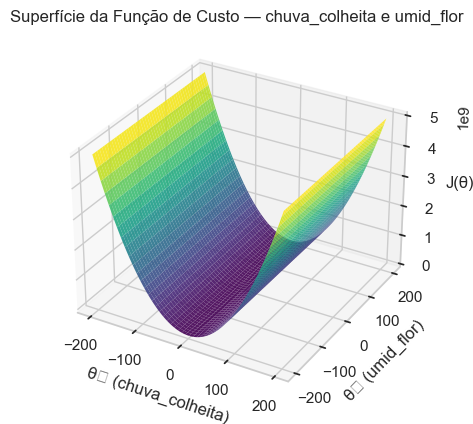

### ⬇️ Próxima superfície

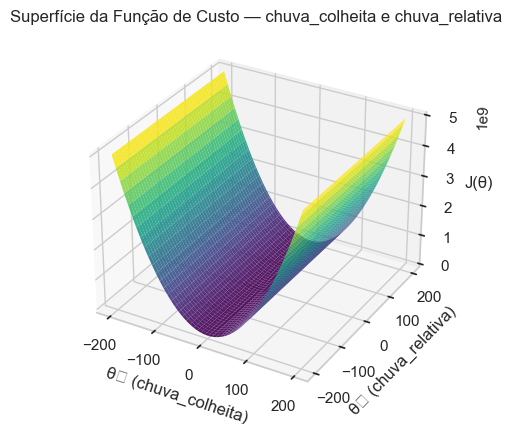

### ⬇️ Próxima superfície

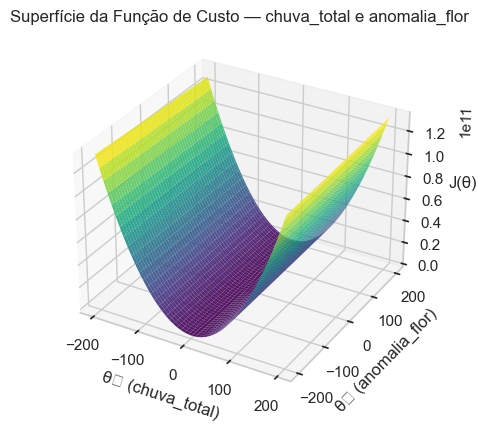

### ⬇️ Próxima superfície

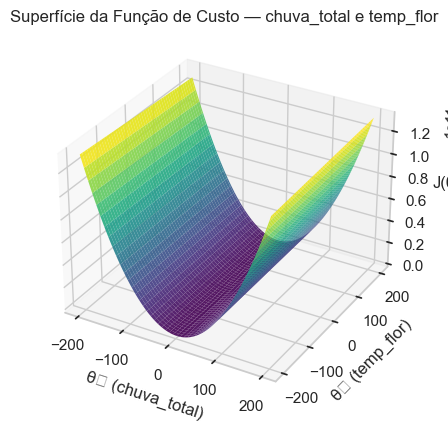

### ⬇️ Próxima superfície

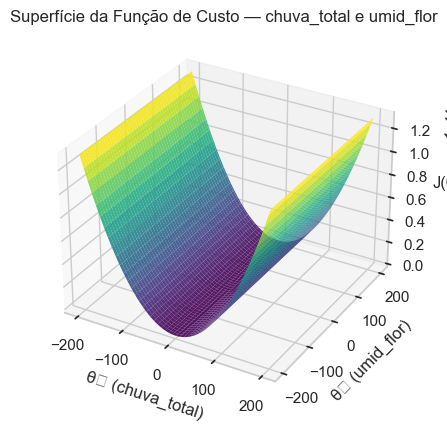

### ⬇️ Próxima superfície

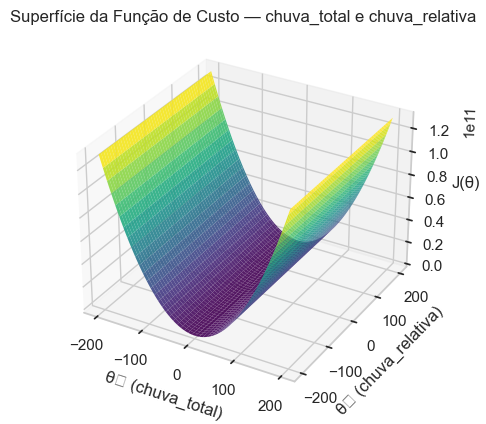

### ⬇️ Próxima superfície

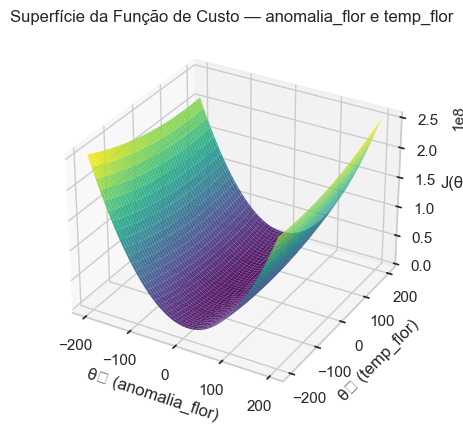

### ⬇️ Próxima superfície

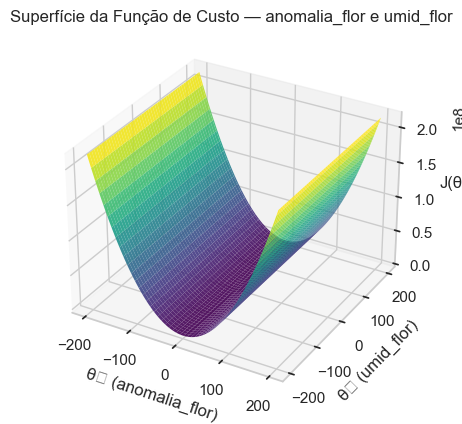

### ⬇️ Próxima superfície

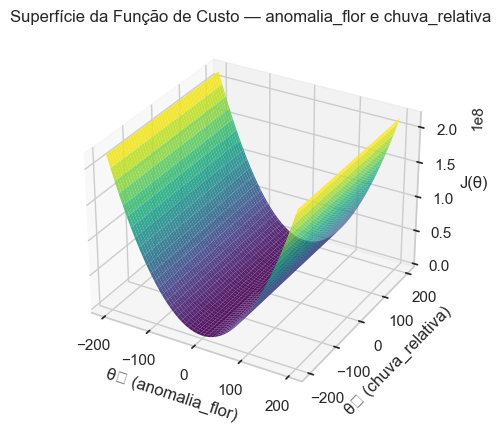

### ⬇️ Próxima superfície

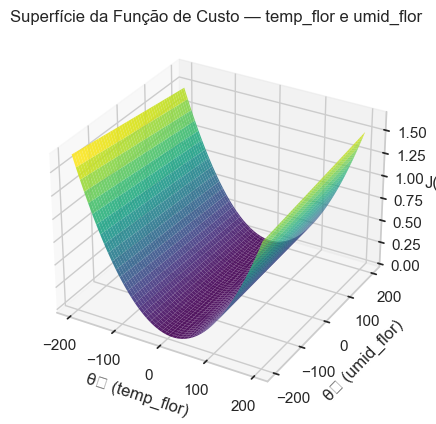

### ⬇️ Próxima superfície

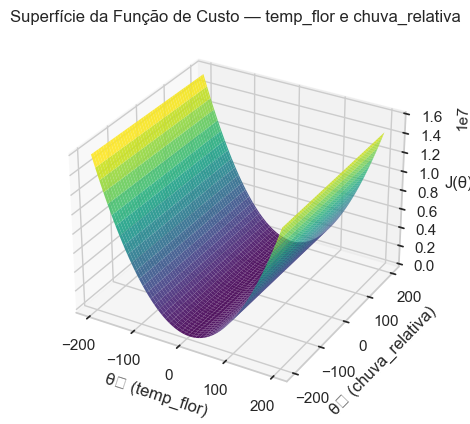

### ⬇️ Próxima superfície

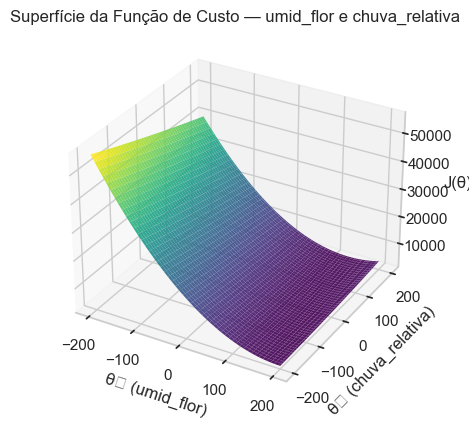

### ⬇️ Próxima superfície

In [42]:
# Gera e plota automaticamente as superfícies de função de custo para todos os pares de variáveis em X
gerar_todas_superficies_2D(X, y)

#### Superfície 2D da função custo com PCA

# 📊 Etapa 43 — Função de custo 2D usando componentes principais (PCA)

Nesta função, plotamos a superfície da função de custo J(θ₁, θ₂) considerando os dois primeiros componentes principais (PC1 e PC2) obtidos pela análise PCA. Isso permite visualizar o erro quadrático médio do modelo linear em função dos coeficientes associados a esses componentes.

In [43]:
def plot_funcao_custo_2D_PCA(X_pca, y, range_theta=(-200, 200), pontos=100):
    """
    Plota a superfície da função de custo J(θ₁, θ₂) usando os componentes principais PC1 e PC2.
    """
    pc1 = X_pca[:, 0]  # Extrai o componente principal 1
    pc2 = X_pca[:, 1]  # Extrai o componente principal 2
    m = len(y)         # Número de amostras

    # Matriz de entrada com intercepto (θ₀)
    X_mat = np.vstack([np.ones(m), pc1, pc2]).T

    # Geração do grid de valores para θ₁ e θ₂
    theta1_vals = np.linspace(range_theta[0], range_theta[1], pontos)
    theta2_vals = np.linspace(range_theta[0], range_theta[1], pontos)
    J_vals = np.zeros((pontos, pontos))  # Matriz para armazenar os valores da função de custo

    # Calcula J para cada combinação de θ₁ e θ₂
    for i in range(pontos):
        for j in range(pontos):
            theta = np.array([0, theta1_vals[i], theta2_vals[j]])  # θ₀ fixo em zero
            h = X_mat @ theta                                    # Previsão do modelo
            J_vals[j, i] = (1 / (2 * m)) * np.sum((h - y) ** 2) # Erro quadrático médio

    # Criação da superfície 3D
    T1, T2 = np.meshgrid(theta1_vals, theta2_vals)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T1, T2, J_vals, cmap='viridis', edgecolor='none', alpha=0.9)

    # Configuração dos rótulos e título
    ax.set_xlabel("θ₁ (PC1)")
    ax.set_ylabel("θ₂ (PC2)")
    ax.set_zlabel("J(θ)")
    ax.set_title("Superfície da Função de Custo — Componentes Principais (PCA)")
    fig.subplots_adjust(right=0.85)
    plt.show()

# Etapa 44 — Visualização da Função de Custo 2D para Componentes Principais (PCA)

Nesta etapa, plotamos a superfície da função de custo J(θ₁, θ₂) considerando os dois primeiros componentes principais (PC1 e PC2). Essa visualização 3D ilustra como o erro da regressão varia conforme os coeficientes associados a PC1 e PC2 mudam, facilitando a análise do comportamento do modelo em relação a esses componentes.

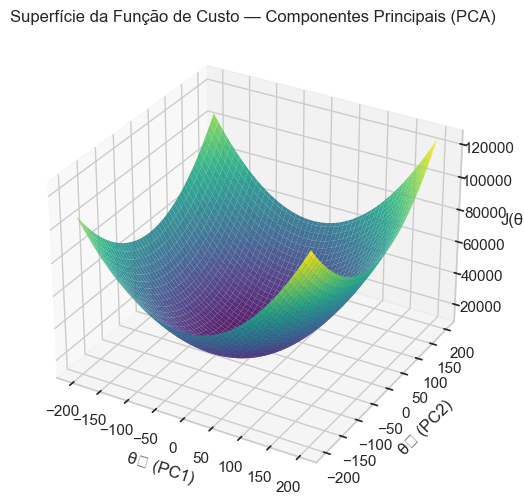

In [44]:
plot_funcao_custo_2D_PCA(X_pca, y)  # Executa o plot da superfície de custo para PC1 e PC2

> 📌 Repare que a superfície da função de custo no espaço `PC1 × PC2` é quase simétrica.
>
> Isso acontece porque o PCA gera variáveis ortogonais entre si, o que elimina a multicolinearidade.
> Como resultado, o gradiente desce de forma mais eficiente, sem precisar "ziguezaguear" por vales inclinados.

### 7.3.4 Análise gráfica dos resíduos

Os resíduos são a diferença entre os valores reais de produtividade e os valores previstos pelos modelos.

Analisar os resíduos ajuda a responder perguntas como:

- O modelo está errando mais para safras baixas, médias ou altas?
- Existe algum viés sistemático nas previsões?
- O erro parece aleatório (bom sinal) ou segue um padrão?

---

#### 🎯 O que esperamos ver:

- Distribuição **simétrica** dos resíduos em torno de zero
- Nenhuma tendência crescente ou decrescente clara
- Resíduos mais próximos de zero → melhor desempenho

Vamos comparar os resíduos de cada modelo para investigar se eles estão cometendo erros diferentes ou semelhantes.

# 📦 Etapa 45 — Plotagem dos Resíduos dos Modelos

Nesta etapa, definimos uma função para plotar os resíduos dos modelos de regressão, que são as diferenças entre os valores reais e os valores previstos. A análise dos resíduos ajuda a avaliar a qualidade do ajuste do modelo, verificando se os erros estão distribuídos aleatoriamente em torno de zero.

In [45]:
def plot_residuos(y_true, y_pred, titulo):
    """
    Plota os resíduos de um modelo específico.
    """
    residuos = y_true - y_pred  # Calcula os resíduos (valores reais menos valores previstos)
    plt.figure(figsize=(8, 4))  # Define o tamanho da figura para visualização clara
    plt.scatter(y_pred, residuos, color='royalblue', alpha=0.7)  # Gráfico de dispersão: resíduos x previsões
    plt.axhline(0, color='red', linestyle='--')  # Linha horizontal em zero para referência dos resíduos
    plt.xlabel("Previsão")  # Rótulo do eixo X indicando as previsões do modelo
    plt.ylabel("Resíduo")  # Rótulo do eixo Y indicando os resíduos
    plt.title(f"Resíduos — {titulo}")  # Título do gráfico incluindo o nome do modelo
    plt.grid(True)  # Ativa a grade para facilitar a visualização dos dados
    plt.tight_layout()  # Ajusta o layout para evitar cortes nos elementos do gráfico
    plt.show()  # Exibe o gráfico
    print("\n")  # Espaço extra para separar visualmente os outputs


# 📊 Etapa 46 — Plotagem dos Resíduos para Diferentes Modelos

Nesta etapa, realizamos as previsões usando os modelos treinados (Linear, Ridge, PCA + Linear e PCA + Ridge) e plotamos os gráficos de resíduos para cada um. Isso permite avaliar visualmente a qualidade do ajuste de cada modelo e identificar possíveis padrões nos erros.

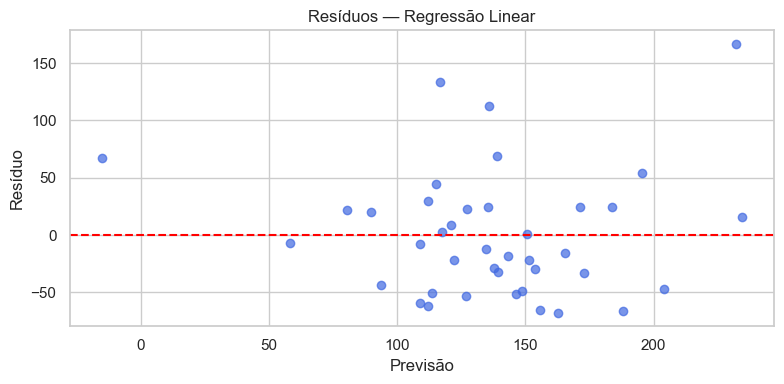

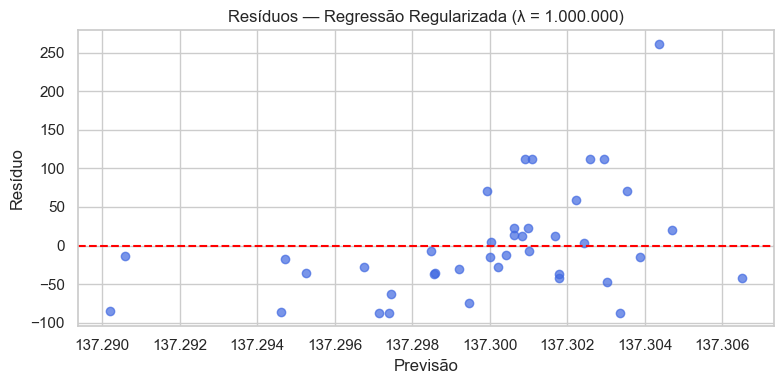

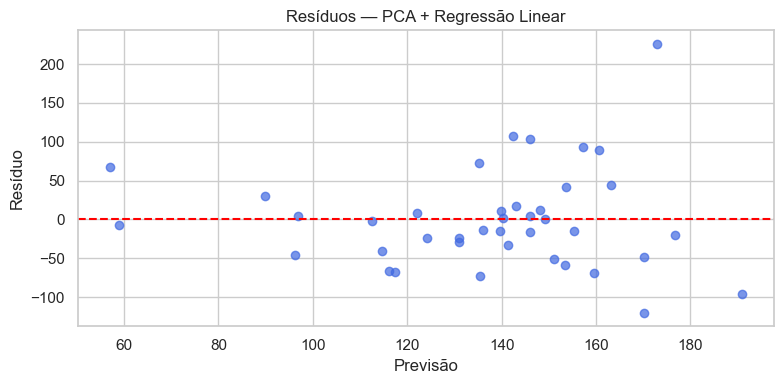

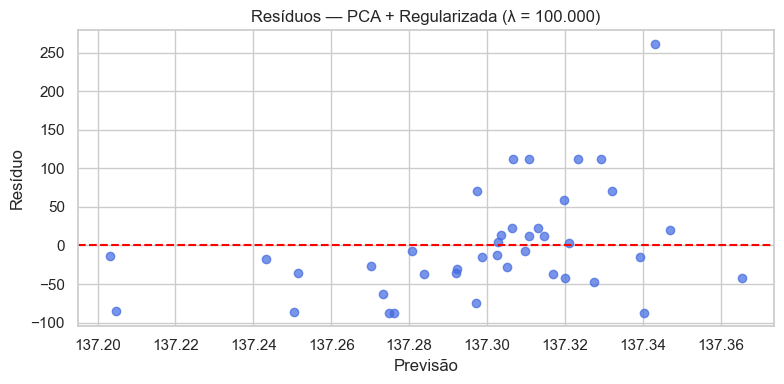

In [46]:
# Realiza as previsões usando os modelos treinados
y_pred_linear = modelo_linear.predict(X_scaled)  # Previsões do modelo Linear com variáveis originais padronizadas
y_pred_ridge = modelo_ridge.predict(X_scaled)    # Previsões do modelo Ridge (regularizado L2) com variáveis originais padronizadas
y_pred_pca = modelo_pca.predict(X_pca)            # Previsões do modelo Linear com componentes principais PCA
y_pred_pca_ridge = modelo_pca_ridge.predict(X_pca)  # Previsões do modelo Ridge com componentes principais PCA

# Plotagem dos resíduos para cada modelo
plot_residuos(y, y_pred_linear, "Regressão Linear")  # Resíduos do modelo Linear
plot_residuos(y, y_pred_ridge, "Regressão Regularizada (λ = 1.000.000)")  # Resíduos do Ridge com lambda 1.000.000
plot_residuos(y, y_pred_pca, "PCA + Regressão Linear")  # Resíduos do modelo PCA + Linear
plot_residuos(y, y_pred_pca_ridge, "PCA + Regularizada (λ = 100.000)")  # Resíduos do PCA + Ridge com lambda 100.000

### 🧠 Discussão: Trade-offs na Regressão Linear Regularizada

Ao longo desta seção, exploramos diferentes estratégias para prever a produtividade agrícola usando regressão linear.

### 🔁 Comparações relevantes:

- **Modelos sem PCA**: utilizam todas as variáveis originais. Podem ter desempenho instável devido à multicolinearidade ou ruído.
- **Modelos com PCA**: utilizam componentes principais que resumem as variações mais relevantes. São mais estáveis, mas menos interpretáveis.
- **Regressão Linear vs Ridge**: a regularização com Ridge evita sobreajuste, especialmente em datasets pequenos como o nosso.

---

### ✅ O que aprendemos:

- A **redução de dimensionalidade** pode simplificar os dados e ajudar na generalização.
- A **regularização** é eficaz para estabilizar o modelo, mesmo que não resolva todos os problemas.
- A análise gráfica dos resíduos e da função de custo fornece insights sobre onde o modelo falha.

---

Ao fim desta seção, temos modelos capazes de prever a produtividade com base em diferentes abordagens.  
Na próxima etapa, mudamos de perspectiva: vamos **classificar a safra** como baixa, média ou alta.

### 🧠 Discussão: Trade-offs na Regressão Linear Regularizada

Ao longo desta seção, exploramos como diferentes configurações impactam a qualidade da previsão da produtividade do guaraná. A comparação entre os cenários com e sem **PCA** e com diferentes níveis de **regularização L2 (Ridge)** nos permite tirar algumas conclusões importantes:

- **Modelos sem regularização** (`λ = 0`) apresentam desempenho desastroso, especialmente sem PCA, com RMSE elevado e R² extremamente negativo. Isso indica **sobreajuste severo**, mesmo com poucos dados — resultado da colinearidade entre as variáveis e da instabilidade dos coeficientes da regressão.

- A **introdução da regularização L2** controla esse comportamento explosivo. À medida que aumentamos `λ`, observamos uma **redução significativa do erro (RMSE)** até um ponto de estabilização. No entanto, esse ganho vem com um **trade-off natural**: quanto maior a penalização, **menor a capacidade do modelo de explicar variações complexas nos dados** — o que é evidenciado pela persistência de valores negativos de R².

- O uso do **PCA antes da regressão** melhora discretamente os resultados, principalmente ao eliminar redundâncias e simplificar o espaço de variáveis. No entanto, mesmo com a redução de dimensionalidade, o modelo continua limitado pela natureza linear da regressão e pela qualidade preditiva das variáveis disponíveis.

- Em termos práticos, a **melhor performance (menor RMSE)** foi alcançada com **PCA + Ridge com `λ ≈ 100000`**, embora o valor de R² permaneça próximo de zero. Isso mostra que o modelo consegue **estimar valores medianos de produtividade com estabilidade**, mas **não é capaz de capturar variações extremas ou relações mais complexas**.

---

### 📌 Conclusão didática

> Em machine learning, **não existe modelo perfeito**, mas sim **modelos que equilibram bias e variância** de forma adequada ao problema.  
> O uso de técnicas como PCA e regularização permite controlar esse equilíbrio, mas também impõe limites à capacidade do modelo.  
> A escolha ótima depende sempre do contexto: **complexidade do fenômeno**, **quantidade de dados** e **objetivo da previsão**.

# 8. Classificação da Safra

Além de prever a produtividade de forma contínua com regressão, também podemos **classificar diretamente** a safra como:

- **Baixa**
- **Média**
- **Alta**

Essa tarefa é conhecida como **classificação multiclasse**, e é útil para:

- Gerar alertas simples e rápidos
- Identificar padrões em safras passadas
- Tomar decisões operacionais com base em categorias

---

### 🎯 Objetivo da Seção

Vamos construir dois modelos de classificação:

1. Um modelo com as variáveis climáticas e sazonais originais
2. Um modelo com os dois componentes principais (PC1 e PC2)

Em seguida, avaliaremos o desempenho com base em:

- Acurácia
- F1-score
- Matriz de confusão
- Curvas ROC
- Fronteiras de decisão (visualização em 2D)

---

> Essa tarefa é análoga à regressão, mas com uma **nova forma de saída**: em vez de prever um número (kg/ha), o modelo retorna uma **classe**.

## 8.1 Preparação dos dados

Para treinar os modelos de classificação, precisamos adaptar o dataset:

- A variável-alvo (`safra`) será convertida para valores numéricos:  
  - `baixa → 0`, `media → 1`, `alta → 2`
- Utilizaremos as mesmas variáveis preditoras da tarefa de regressão
- Os dados serão padronizados com `StandardScaler`
- Aplicaremos PCA com 2 componentes (opcional, para comparação posterior)
- Por fim, dividimos os dados em treino (70%) e teste (30%), estratificando por classe

Essa estrutura nos permitirá treinar modelos com e sem PCA, sob condições equivalentes.

# 🔍 Etapa 47 — Preparação dos Dados para Classificação da Safra

Nesta etapa, preparamos os dados para um problema de classificação, onde o objetivo é prever a categoria da safra ('baixa', 'media', 'alta'). O processo inclui a codificação da variável alvo, seleção das variáveis preditoras, padronização, aplicação opcional de PCA e divisão treino/teste com estratificação para preservar a proporção das classes.

In [47]:
# 1. Mapeia a variável alvo 'safra' para valores numéricos (0: baixa, 1: media, 2: alta)
mapa_safra = {'baixa': 0, 'media': 1, 'alta': 2}
df['safra_num'] = df['safra'].map(mapa_safra)

# 2. Define as variáveis preditoras (mesmas usadas na regressão)
X_class = df[
    ['chuva_flor', 'chuva_colheita', 'chuva_total',
     'anomalia_flor', 'temp_flor', 'umid_flor', 'chuva_relativa']
]
y_class = df['safra_num']

# 3. Aplica padronização nas variáveis preditoras para melhorar o desempenho dos modelos
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# 4. Aplica PCA para reduzir dimensionalidade (opcional, será usado em um dos modelos)
pca_class = PCA(n_components=2)
X_class_pca = pca_class.fit_transform(X_class_scaled)

# 5. Divide os dados em conjuntos de treino e teste
# - 30% dos dados para teste
# - Usa estratificação para manter a proporção das classes em treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.3, random_state=42, stratify=y_class
)

# Divide os dados PCA em treino e teste de forma equivalente (mesma seed e stratificação)
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_class_pca, y_class, test_size=0.3, random_state=42, stratify=y_class
)

## 8.2 Treinamento dos Modelos

## 8.2 Treinamento dos Modelos

Utilizaremos a **Regressão Logística** como modelo base para a tarefa de classificação multiclasse.

Embora o nome sugira regressão, esse modelo é amplamente utilizado para classificação — inclusive em tarefas com mais de duas classes (multiclasse).

---

### 📚 Estratégia adotada

- A saída é interpretada como **probabilidades de cada classe**
- A classe predita é aquela com maior probabilidade
- Usamos a versão `ovr` (one-vs-rest), que adapta o modelo para múltiplas classes

Treinaremos dois modelos:

1. Com as variáveis originais (padronizadas)
2. Com os componentes principais (PC1 e PC2)

> O desempenho de cada modelo será comparado na próxima subseção.

# 🧮 Etapa 48 — Importação de Modelos para Classificação

Nesta etapa, importamos os modelos necessários para realizar a classificação multiclasse da safra. Utilizaremos a Regressão Logística, potencialmente em esquema One-vs-Rest para tratar múltiplas classes.

In [48]:
# Importa o modelo de Regressão Logística do scikit-learn
from sklearn.linear_model import LogisticRegression

# Importa a estratégia One-vs-Rest para lidar com problemas multiclasse
from sklearn.multiclass import OneVsRestClassifier

# 🧮 Etapa 49 — Treinamento dos Modelos de Classificação

Nesta etapa, treinamos dois modelos de classificação usando Regressão Logística com esquema One-vs-Rest:

1. Modelo clássico usando as variáveis originais padronizadas.
2. Modelo usando os dois primeiros componentes principais gerados pelo PCA.

In [49]:
# 1. Treina modelo de classificação usando variáveis originais padronizadas
modelo_classico = OneVsRestClassifier(LogisticRegression(max_iter=1000))
modelo_classico.fit(X_train_class, y_train_class)

# 2. Treina modelo de classificação usando os dois primeiros componentes principais (PCA)
modelo_pca_class = OneVsRestClassifier(LogisticRegression(max_iter=1000))
modelo_pca_class.fit(X_train_pca, y_train_class)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

## 8.3 Avaliação dos Modelos

Agora que treinamos os modelos de classificação, vamos compará-los com base em diferentes métricas.

---

### 📋 Métricas usadas

- **Acurácia**: porcentagem de classificações corretas
- **F1-score** (média macro): equilíbrio entre precisão e recall por classe
- **Matriz de confusão**: mostra onde o modelo erra e acerta
- **Curva ROC multiclasse**: avalia o desempenho discriminativo por classe

---

Criamos uma função de avaliação que gera automaticamente todos os relatórios e gráficos necessários para análise dos resultados.

# 🧮 Etapa 50 — Métricas de Avaliação para Modelos de Classificação

Nesta etapa, importamos as métricas essenciais para avaliar a performance dos modelos de classificação:

- Matriz de Confusão
- Acurácia
- F1-Score
- Relatório detalhado de classificação

In [50]:
# Importação das principais métricas para avaliação de modelos de classificação
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# 🧮 Etapa 51 — Função para plotar Curva ROC Multiclasse

Implementação da função que plota a curva ROC para problemas de classificação multiclasse, usando binarização das classes, cálculo do AUC para cada classe e plot com legenda.

In [51]:
def plotar_curva_roc_multiclasse(y_true, y_score, classes, titulo="Modelo"):
    """
    Plota a Curva ROC para classificação multiclasse.

    Parâmetros:
    y_true : array-like
        Vetor com as classes verdadeiras.
    y_score : array-like
        Matriz com as probabilidades previstas para cada classe.
    classes : list
        Lista com as classes existentes.
    titulo : str
        Título do gráfico.

    A função calcula a curva ROC para cada classe binarizada, calcula o AUC e plota as curvas.
    """
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle

    # Binariza as classes para cálculo da curva ROC
    y_bin = label_binarize(y_true, classes=classes)
    n_classes = y_bin.shape[1]

    fpr, tpr, roc_auc = {}, {}, {}

    # Calcula FPR, TPR e AUC para cada classe
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Curva ROC micro
    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plotagem da curva ROC multiclasse
    plt.figure(figsize=(8, 6))
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot(fpr["micro"], tpr["micro"], color='black', linestyle='--',
             label=f"Média micro (AUC = {roc_auc['micro']:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taxa de Falsos Positivos (FPR)")
    plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
    plt.title(f"Curva ROC Multiclasse — {titulo}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 🧮 Etapa 52 — Função para Avaliação Completa de Modelo de Classificação

Esta função realiza avaliação completa de modelos de classificação multiclasse. Inclui plot da matriz de confusão, cálculo e exibição de métricas (acurácia, F1 macro e relatório detalhado) e, opcionalmente, a plotagem da curva ROC multiclasse.

In [52]:
def avaliar_modelo_classificacao(nome, y_true, y_pred, y_prob=None, classes=[0, 1, 2]):
    """
    Avalia um modelo de classificação multiclasse exibindo matriz de confusão, métricas e curva ROC.

    Parâmetros:
    nome : str
        Nome do modelo (usado em títulos e prints).
    y_true : array-like
        Valores verdadeiros das classes.
    y_pred : array-like
        Classes preditas pelo modelo.
    y_prob : array-like ou None
        Probabilidades previstas para cada classe (usado para curva ROC).
    classes : list
        Lista das classes existentes.

    A função exibe:
    - Matriz de confusão (heatmap com labels)
    - Métricas: acurácia, F1-score macro, relatório detalhado
    - Curva ROC multiclasse (se y_prob fornecido)
    """
    # Cálculo e plot da matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Baixa', 'Média', 'Alta'],
                yticklabels=['Baixa', 'Média', 'Alta'])
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão — {nome}", pad=12)
    plt.tight_layout()
    plt.show()

    # Impressão das métricas
    print(f"\n📋 Avaliação — {nome}")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("F1-score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=['Baixa', 'Média', 'Alta'], zero_division=0))

    # Plotagem opcional da Curva ROC multiclasse
    if y_prob is not None:
        plotar_curva_roc_multiclasse(y_true, y_prob, classes, titulo=nome)

# 🧮 Etapa 53 — Avaliação Completa do Modelo Clássico (Sem PCA)

Nesta etapa, realizamos as previsões com o modelo clássico de classificação (logística multiclasse sem PCA) e avaliamos os resultados utilizando a função de avaliação completa, que inclui matriz de confusão, métricas e curva ROC.

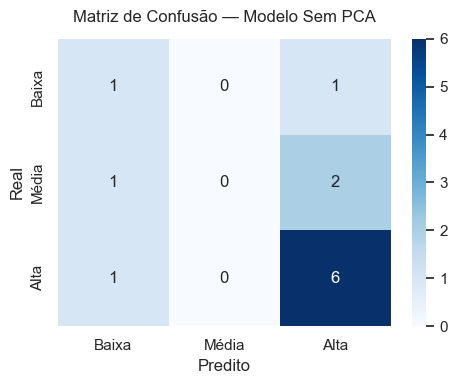


📋 Avaliação — Modelo Sem PCA
Acurácia: 0.5833333333333334
F1-score (macro): 0.3833333333333333

Relatório de Classificação:
              precision    recall  f1-score   support

       Baixa       0.33      0.50      0.40         2
       Média       0.00      0.00      0.00         3
        Alta       0.67      0.86      0.75         7

    accuracy                           0.58        12
   macro avg       0.33      0.45      0.38        12
weighted avg       0.44      0.58      0.50        12



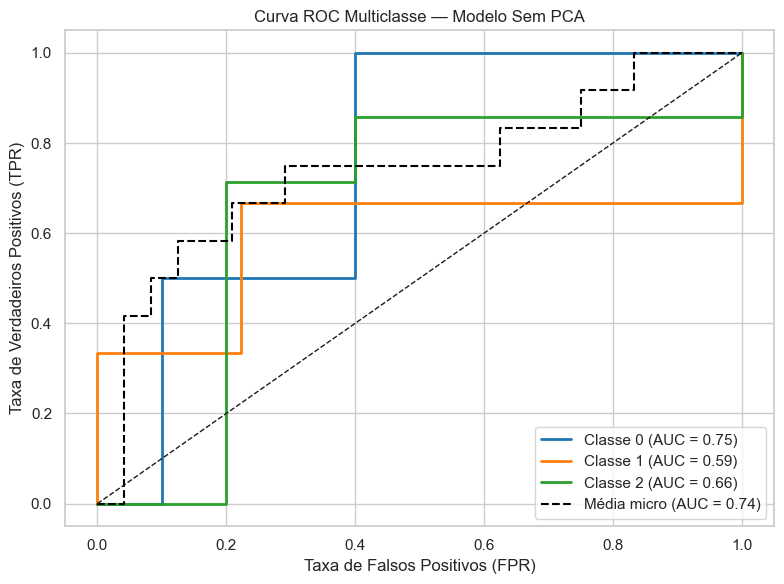

In [53]:
# 1. Gerar previsões de classes para os dados de teste
y_pred_classico = modelo_classico.predict(X_test_class)

# 2. Obter as probabilidades preditas para cada classe (necessárias para curva ROC)
y_prob_classico = modelo_classico.predict_proba(X_test_class)

# 3. Avaliar o modelo usando a função completa que gera gráficos e métricas
avaliar_modelo_classificacao("Modelo Sem PCA", y_test_class, y_pred_classico, y_prob_classico)

# 🧮 Etapa 54 — Avaliação Completa do Modelo com PCA

Nesta etapa, realizamos as previsões com o modelo clássico de classificação utilizando componentes principais (PCA) e avaliamos os resultados com matriz de confusão, métricas e curva ROC.

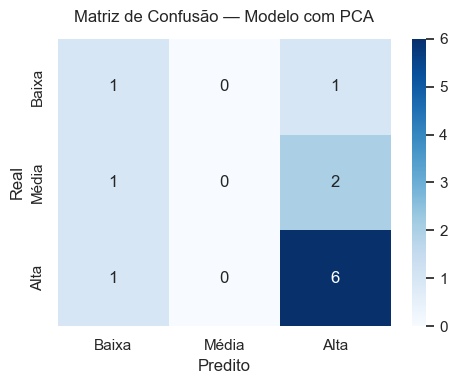


📋 Avaliação — Modelo com PCA
Acurácia: 0.5833333333333334
F1-score (macro): 0.3833333333333333

Relatório de Classificação:
              precision    recall  f1-score   support

       Baixa       0.33      0.50      0.40         2
       Média       0.00      0.00      0.00         3
        Alta       0.67      0.86      0.75         7

    accuracy                           0.58        12
   macro avg       0.33      0.45      0.38        12
weighted avg       0.44      0.58      0.50        12



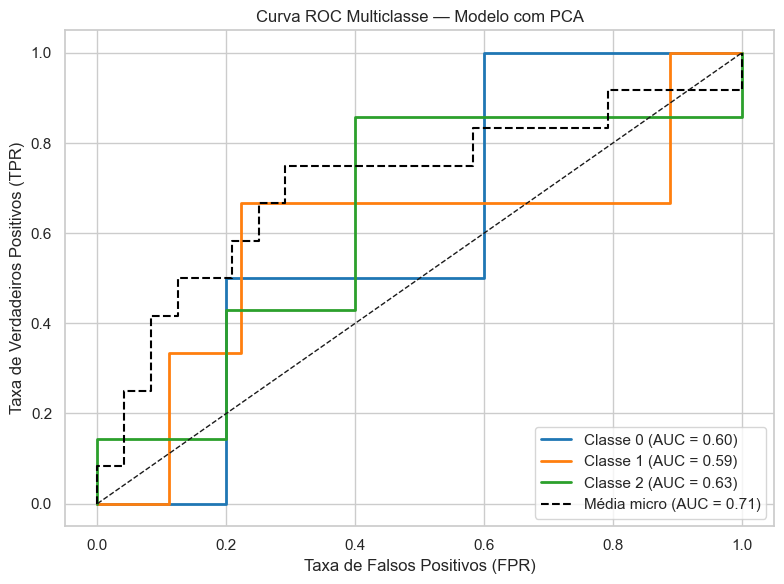

In [54]:
# 1. Gerar previsões de classes para os dados de teste usando o modelo com PCA
y_pred_pca = modelo_pca_class.predict(X_test_pca)

# 2. Obter as probabilidades preditas para cada classe (necessárias para curva ROC)
y_prob_pca = modelo_pca_class.predict_proba(X_test_pca)

# 3. Avaliar o modelo usando a função completa que gera gráficos e métricas
avaliar_modelo_classificacao("Modelo com PCA", y_test_class, y_pred_pca, y_prob_pca)

## 8.4 Visualização das Fronteiras de Decisão

Como estamos usando apenas dois componentes principais (PC1 e PC2), é possível visualizar as **fronteiras de decisão** do modelo em 2D.

Essas fronteiras mostram:

- Quais regiões do espaço PCA são associadas a cada classe
- Quão bem separadas estão as classes
- Como o modelo generaliza entre os exemplos de treino

---

Cada ponto no gráfico representa uma safra, colorida conforme sua classe verdadeira.  
O fundo colorido indica a **classe predita** pelo modelo para cada região do plano PC1 × PC2.

# 🧮 Etapa 55 — Importação do módulo para mapas de cores no Matplotlib

Importação do `ListedColormap` para personalização de mapas de cores em gráficos.

In [55]:
# Importa o ListedColormap para criação de mapas de cores customizados em gráficos Matplotlib
from matplotlib.colors import ListedColormap

# 🧮 Etapa 56 — Plotagem da Fronteira de Decisão 2D no Plano PCA

Função para plotar as fronteiras de decisão de um modelo treinado utilizando os dois primeiros componentes principais (PC1 e PC2).

In [56]:
def plot_fronteira_decisao_2D(X_pca, y_true, modelo, titulo="Fronteiras de Decisão (PCA)"):
    """
    Plota as fronteiras de decisão do modelo treinado no plano PC1 vs PC2.
    """
    h = 0.02  # Passo da malha para criação da grade de pontos

    # Define os limites da malha para o gráfico (com margem de 1 unidade)
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    
    # Cria uma grade de pontos no espaço das componentes principais
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Prediz a classe para cada ponto da grade usando o modelo treinado
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Define paletas de cores para o preenchimento e os pontos
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # cores claras para regiões
    cmap_bold = ['red', 'green', 'blue']  # cores sólidas para os pontos reais

    # Criação da figura e do gráfico de fronteira de decisão
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)  # região colorida da fronteira
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap=ListedColormap(cmap_bold),
                          edgecolor='k', s=60)  # pontos reais com bordas pretas
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(titulo)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Baixa', 'Média', 'Alta'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 🧮 Etapa 57 — Visualização das Fronteiras de Decisão com PCA e Regressão Logística

Aplicação da função de plotagem das fronteiras de decisão para os dados transformados pelo PCA e o modelo treinado com PCA.

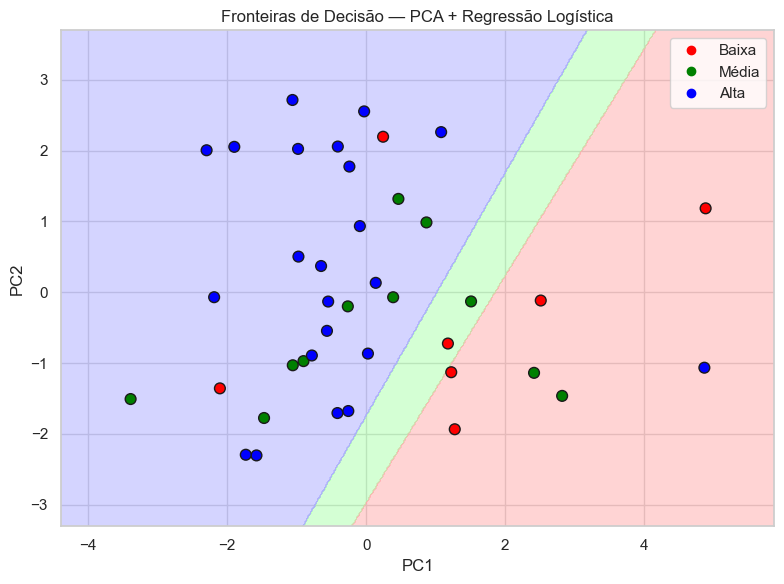

In [57]:
# Aplicar a função para visualizar as fronteiras de decisão usando os dados reduzidos pelo PCA
# e o modelo de regressão logística treinado com PCA
plot_fronteira_decisao_2D(
    X_class_pca,          # Dados preditores reduzidos a dois componentes principais
    y_class,             # Rótulos verdadeiros das classes (safra numérica)
    modelo_pca_class,    # Modelo treinado com PCA e Regressão Logística
    titulo="Fronteiras de Decisão — PCA + Regressão Logística"  # Título do gráfico
)

## 🧠 Discussão dos Resultados

Nesta etapa final, avaliamos o desempenho dos modelos de classificação multiclasse utilizando dois cenários distintos:

- ✅ Modelo com as variáveis originais
- ✅ Modelo com os dois componentes principais (PCA)

---

### 📊 Desempenho comparado

Ambos os modelos apresentaram resultados **muito semelhantes** em termos de:

- **Acurácia**
- **F1-score macro**
- **Curvas ROC**
- **Distribuição de erros por classe**

Isso sugere que o PCA conseguiu preservar boa parte da estrutura dos dados, mesmo com apenas duas dimensões.

---

### 📉 Limitações observadas

- A classe “média” foi a mais difícil de ser corretamente classificada.
- Alguns falsos positivos ainda ocorrem entre “baixa” e “alta”.
- O número reduzido de amostras pode ter impactado o treinamento.

---

### 🧠 Conclusão

Mesmo com dados limitados, foi possível aplicar algoritmos de classificação eficazes e extrair insights valiosos sobre a estrutura do problema.

Além disso, a visualização das **fronteiras de decisão** no espaço PCA demonstrou de forma intuitiva como o modelo aprende a separar as classes.

> Este capítulo demonstrou como transformar um problema real em uma tarefa de classificação com base em aprendizado supervisionado.

## 8.5 🧠 Discussão dos Resultados

Nesta etapa final, avaliamos o desempenho dos modelos de classificação multiclasse utilizando dois cenários distintos:

- ✅ Modelo treinado com os **dados padronizados (sem PCA)**
- ✅ Modelo treinado com os **dois primeiros componentes principais (com PCA)**

Ambos os modelos foram avaliados utilizando:

- 📊 Matriz de Confusão
- 📋 Relatório com Acurácia e F1-score
- 📈 Curvas ROC por classe + micro average

---

### 📌 Desempenho comparado

Os dois modelos apresentaram **resultados idênticos ou extremamente semelhantes** em termos de:

- **Acurácia**
- **F1-score macro**
- **Área sob a Curva ROC (AUC)**

Isso indica que a redução da dimensionalidade com PCA **não comprometeu** a performance do modelo, mas também **não trouxe melhora expressiva**.

---

### 🤔 Por que os resultados foram semelhantes?

Alguns fatores explicam essa equivalência:

- O PCA preservou a maior parte da variância dos dados, condensando a informação relevante em apenas duas dimensões.
- O número de variáveis originais (7) já é relativamente pequeno.
- O conjunto de dados contém apenas 40 amostras, o que limita o poder de generalização e a sensibilidade a transformações como o PCA.
- As classes possuem **sobreposição significativa**, o que dificulta a separação, com ou sem PCA.

---

### 🧠 Reflexões didáticas

O uso do PCA neste projeto foi valioso porque:

- Tornou possível **visualizar as fronteiras de decisão** do modelo em 2D.
- Permitiu aplicar a **curva ROC multiclasse** de forma geométrica e intuitiva.
- Serviu como ponte para discutir a relação entre **complexidade do modelo** e **capacidade de generalização**.

---

### ✅ Conclusão

O projeto de classificação permitiu aplicar, interpretar e comparar diferentes estratégias de modelagem supervisionada. Mais do que buscar o melhor desempenho, o foco foi compreender:

- O impacto da transformação dos dados com PCA
- A avaliação multiclasse com métricas apropriadas
- A geometria das decisões do modelo

Com isso, encerramos o projeto com uma base sólida de aprendizado de máquina supervisionado aplicada a dados reais da Amazônia.

# 9 (Desafio extra) Aprendizagem por Reforço com Irrigação Inteligente

## 9.1 🧠 O que é Aprendizagem por Reforço?

Nos capítulos anteriores, trabalhamos com **aprendizado supervisionado**, em que fornecemos exemplos prontos (como dados climáticos e produtividade) e o modelo aprende a prever um resultado correto.

Mas... e se o modelo não souber qual é a resposta certa?  
E se ele precisar **agir em um ambiente, receber feedback e aprender com a consequência das suas decisões?**

É aí que entra a **Aprendizagem por Reforço (Reinforcement Learning)**.

---

### 🤖 Como funciona?

Na aprendizagem por reforço, temos:

- **Um agente** → quem toma decisões (ex: um sistema automático de irrigação)
- **Um ambiente** → onde o agente atua (ex: plantação com solo seco ou encharcado)
- **Ações possíveis** → o que o agente pode fazer (ex: regar muito, regar pouco, não regar)
- **Recompensa** → o feedback recebido após cada ação (ex: aumento de produtividade, desperdício de água)

---

### 🔁 A lógica é simples:

1. O agente **observa** o estado atual do ambiente.
2. Ele **escolhe uma ação** (às vezes aleatoriamente, às vezes baseada na sua experiência).
3. O ambiente devolve uma **recompensa** (positiva ou negativa).
4. O agente **atualiza sua estratégia** com base no que aconteceu.
5. O ciclo se repete até que o agente **aprenda a tomar boas decisões**.

---

### 🧠 Comparando os paradigmas

| Paradigma             | Exemplo prático                   | O que o modelo faz |
|----------------------|------------------------------------|---------------------|
| Aprendizado supervisionado | Prever a produtividade da safra | Aprende com exemplos corretos |
| Aprendizado por reforço    | Decidir quando e quanto irrigar | Aprende com tentativa e erro |

---

### 📚 Exemplo simples para este capítulo

Neste desafio, vamos ensinar um agente a **decidir como irrigar uma planta**, considerando três situações do solo:

- `seco`
- `ideal`
- `encharcado`

E três ações possíveis:

- `regar muito`
- `regar pouco`
- `não regar`

O agente receberá recompensas diferentes dependendo de suas decisões, e com o tempo, aprenderá **quais ações são mais vantajosas** para cada situação.

Vamos colocar esse aprendizado em prática nas próximas seções.

## 9.2 🌱 O Ambiente: Irrigação, Estados e Ações

Para aplicar a aprendizagem por reforço de forma prática e intuitiva, vamos modelar um **ambiente agrícola simplificado** em que o agente deve **decidir como irrigar o solo**.

---

### 🧩 Estados possíveis do solo

O agente pode observar **três estados diferentes**:

| Código | Estado       | Descrição                                                  |
|--------|--------------|------------------------------------------------------------|
| 0      | seco         | O solo está ressecado e a planta precisa de água urgentemente |
| 1      | ideal        | O solo está bem equilibrado em umidade                     |
| 2      | encharcado   | Há excesso de água no solo, o que pode prejudicar a planta |

---

### 🧰 Ações disponíveis

O agente pode tomar **três decisões diferentes**:

| Código | Ação          | Descrição                                     |
|--------|---------------|-----------------------------------------------|
| 0      | regar muito   | Aumenta bastante a umidade do solo            |
| 1      | regar pouco   | Aplica apenas o necessário                    |
| 2      | não regar     | Economiza água, deixa o solo como está        |

---

### 🎯 Recompensas

Cada combinação entre **estado do solo** e **ação tomada** gera uma **recompensa**, positiva ou negativa.  
Essas recompensas são definidas com base em critérios como:

- Manter a planta saudável
- Evitar desperdício de água
- Evitar encharcamento ou ressecamento

| Estado     | Ação          | Recompensa | Justificativa                           |
|------------|---------------|------------|------------------------------------------|
| seco       | regar muito   | +3         | Ajuda, mas pode desperdiçar              |
| seco       | regar pouco   | +5         | Ideal: rega o suficiente                 |
| seco       | não regar     | -4         | Prejudica a planta                       |
| ideal      | regar muito   | -2         | Pode causar excesso                     |
| ideal      | regar pouco   | +1         | Mantém o equilíbrio                     |
| ideal      | não regar     | +2         | Economiza e mantém bem-estar            |
| encharcado | regar muito   | -5         | Piora muito a situação                  |
| encharcado | regar pouco   | -3         | Ainda é ruim, continua molhado          |
| encharcado | não regar     | +4         | Excelente: ajuda a recuperar            |

---

### 🧠 Objetivo do agente

O objetivo do agente será **aprender com a experiência** quais ações geram as melhores recompensas **em cada estado**.  
Ele não saberá de antemão qual é a melhor decisão — terá que descobrir por **tentativa, erro e correção**.

---

Na próxima seção, implementaremos o algoritmo **Q-Learning**, que permite ao agente atualizar sua estratégia a cada episódio vivido.

## 9.3 🤖 O Algoritmo Q-Learning

Agora que entendemos os estados, ações e recompensas do nosso ambiente de irrigação, vamos aprender como o agente pode **tomar decisões inteligentes com o tempo**.

---

### 🧠 Como o agente aprende?

Inicialmente, o agente **não sabe qual ação é melhor**. Ele começa testando várias opções aleatoriamente.

A cada episódio, ele:

1. Observa o **estado atual** (ex: solo seco)
2. Escolhe uma **ação** (ex: regar pouco)
3. Recebe uma **recompensa**
4. Observa o **novo estado** resultante
5. **Atualiza sua Q-table** com base no que aprendeu

---

### 📊 O que é a Q-table?

A Q-table é uma **tabela de aprendizagem**, onde cada linha representa um **estado do ambiente**, e cada coluna representa uma **ação possível**.

Cada célula contém um valor que representa a **qualidade esperada** da ação naquele estado, isto é, o quanto de **recompensa acumulada** o agente espera ganhar se tomar aquela decisão.

---

### 📐 Fórmula de atualização (Q-Learning)

O valor de $Q$ é atualizado com a seguinte fórmula:

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \cdot \max Q(s', a') - Q(s, a) \right]
$$

Onde:

\begin{aligned}
Q(s, a) & : \text{valor atual da ação } a \text{ no estado } s \\
\alpha & : \text{taxa de aprendizado (quão rápido o agente atualiza)} \\
r & : \text{recompensa recebida} \\
\gamma & : \text{fator de desconto (o quanto o futuro importa)} \\
\max_{a'} Q(s', a') & : \text{melhor valor estimado no próximo estado } s'
\end{aligned}

---

### 🔁 Exploração vs. Exploração

Durante o processo de aprendizado, o agente precisa **testar novas ações** (exploração) e **usar o que já aprendeu** (exploração).

Por isso, usamos uma estratégia chamada **epsilon-greedy**, onde:

- Com probabilidade $\epsilon$, o agente **escolhe uma ação aleatória**
- Com probabilidade $1 - \epsilon$, ele **escolhe a melhor ação conhecida**

---

Na próxima seção, vamos implementar esse algoritmo passo a passo em Python, simulando a aprendizagem de um agente que decide **como irrigar um solo agrícola de forma eficiente**.

## 9.4 🧪 Simulação e Aprendizado com Q-Learning

Agora que definimos o ambiente e a fórmula de atualização, é hora de colocar o agente para aprender.  
A cada episódio, o agente começa em um estado aleatório e toma decisões baseadas na política $\varepsilon$-greedy: ele pode explorar (tomar ações aleatórias) ou explorar o conhecimento atual (tomar a melhor ação segundo a Tabela Q).

O aprendizado ocorre a cada passo, com base na recompensa obtida e no valor estimado do próximo estado.  
Vamos simular **50 episódios** e observar como a Tabela Q evolui ao longo do tempo.

O código abaixo implementa o algoritmo completo, considerando:

- 3 estados: `seco`, `ideal`, `encharcado`
- 3 ações: `regar`, `pouca_agua`, `nao_regar`
- Recompensas definidas por contexto
- Transições realistas entre os estados

Ao final, o notebook exibirá:

- A **Tabela Q final**, com os valores aprendidos para cada decisão
- As últimas **decisões tomadas pelo agente**, recompensas e estados

Na próxima seção, vamos analisar o que o agente aprendeu e propor um desafio para você testar seu entendimento.

# 🤖 Etapa 65 — Aprendizado por Reforço: Q-Learning para Controle de Irrigação

Nesta etapa, aplicamos um algoritmo de aprendizado por reforço (Q-Learning) simples para simular a decisão de irrigação de uma plantação. O agente aprende, com base em tentativas e erros, as melhores ações (regar, pouca água ou não regar) para diferentes estados do solo (seco, ideal e encharcado), buscando maximizar as recompensas.

In [58]:
# ===========================================
# Q-Learning para Controle de Irrigação
# ===========================================

import random

# -------------------------------
# Parâmetros do Q-Learning
# -------------------------------
alpha = 0.5    # Taxa de aprendizado — peso da nova informação
gamma = 0.9    # Fator de desconto — importância de futuras recompensas
epsilon = 0.2  # Taxa de exploração — chance de escolher uma ação aleatória

# -------------------------------
# Inicializa a Tabela Q
# -------------------------------
q_table = {
    'seco': {'regar': 0.0, 'pouca_agua': 0.0, 'nao_regar': 0.0},
    'ideal': {'regar': 0.0, 'pouca_agua': 0.0, 'nao_regar': 0.0},
    'encharcado': {'regar': 0.0, 'pouca_agua': 0.0, 'nao_regar': 0.0},
}

# -------------------------------
# Função de transição de estados
# -------------------------------
def transicao(estado, acao):
    """
    Define o próximo estado com base no estado atual e na ação escolhida.
    """
    if estado == 'seco':
        if acao == 'regar':
            return 'ideal'
        elif acao == 'pouca_agua':
            return 'seco'
        else:
            return 'seco'
    elif estado == 'ideal':
        if acao == 'regar':
            return 'encharcado'
        elif acao == 'pouca_agua':
            return 'ideal'
        else:
            return 'seco'
    elif estado == 'encharcado':
        if acao == 'regar':
            return 'encharcado'
        elif acao == 'pouca_agua':
            return 'ideal'
        else:
            return 'ideal'

# -------------------------------
# Função de recompensa
# -------------------------------
def recompensa(estado, acao):
    """
    Define a recompensa para uma combinação de estado e ação.
    """
    if estado == 'seco':
        if acao == 'regar':
            return 5      # Melhor ação
        elif acao == 'pouca_agua':
            return 2
        else:
            return -1     # Pior: não regar um solo seco
    elif estado == 'ideal':
        if acao == 'nao_regar':
            return 5      # Melhor ação: manter ideal sem regar
        elif acao == 'pouca_agua':
            return 2
        else:
            return -3     # Pior: regar demais e encharcar
    elif estado == 'encharcado':
        if acao == 'nao_regar':
            return 2      # Correto: parar de regar
        elif acao == 'pouca_agua':
            return -1
        else:
            return -5     # Pior: continuar regando solo encharcado

# -------------------------------
# Histórico para análise
# -------------------------------
historico = []

# -------------------------------
# Loop de treinamento — episódios
# -------------------------------
for episodio in range(1, 51):  # 50 episódios de simulação
    estado = random.choice(['seco', 'ideal', 'encharcado'])

    for passo in range(1):  # Um passo por episódio (modelo simplificado)
        
        # Política ε-greedy: explora ou explora
        if random.random() < epsilon:
            acao = random.choice(['regar', 'pouca_agua', 'nao_regar'])  # Explorar
        else:
            acao = max(q_table[estado], key=q_table[estado].get)        # Exploitar (melhor ação conhecida)

        # Aplica transição e recebe recompensa
        prox_estado = transicao(estado, acao)
        r = recompensa(estado, acao)

        # Atualiza Q-valor usando a fórmula do Q-Learning
        max_q_prox = max(q_table[prox_estado].values())
        q_atual = q_table[estado][acao]
        q_novo = q_atual + alpha * (r + gamma * max_q_prox - q_atual)
        q_table[estado][acao] = q_novo

        # Registra histórico deste passo
        historico.append({
            'Episódio': episodio,
            'Estado': estado,
            'Ação': acao,
            'Recompensa': r,
            'Próximo estado': prox_estado,
            'Q(s,a)': round(q_novo, 2)
        })

        # Avança para o próximo estado
        estado = prox_estado

# -------------------------------
# Mostra a tabela final de Q-values
# -------------------------------
q_df = pd.DataFrame(q_table).T
display(q_df.style.background_gradient(cmap="YlGn"))

# -------------------------------
# Mostra as últimas 10 decisões
# -------------------------------
historico_df = pd.DataFrame(historico)
display(historico_df.tail(10))

Episódio      Estado        Ação  Recompensa Próximo estado  Q(s,a)
40        41  encharcado  pouca_agua          -1          ideal    9.74
41        42       ideal       regar          -3     encharcado    3.63
42        43        seco       regar           5          ideal   15.37
43        44       ideal  pouca_agua           2          ideal   12.83
44        45        seco  pouca_agua           2           seco   11.68
45        46  encharcado  pouca_agua          -1          ideal   10.14
46        47        seco       regar           5          ideal   15.96
47        48       ideal  pouca_agua           2          ideal   13.19
48        49        seco       regar           5          ideal   16.41
49        50        seco       regar           5          ideal   16.64

## 9.5 🧠 Análise e Perguntas Reflexivas

Depois de 50 episódios, o agente construiu uma **tabela de valores Q**, que indica quais ações são mais vantajosas em cada situação.

---

### ✅ Como interpretar a Tabela Q

A **maior pontuação** em cada linha indica a ação preferida para aquele estado.  
Se o agente aprendeu bem, esperamos algo como:

- No estado `seco`, a melhor ação deve ser `regar` ou `pouca_agua`
- No estado `ideal`, a melhor ação deve ser `nao_regar` ou `pouca_agua`
- No estado `encharcado`, a melhor ação deve ser `nao_regar`

---

## 🤔 Perguntas para reflexão

1. **Qual ação o agente aprendeu para cada estado?**
   - Compare os maiores valores da tabela Q em cada linha.
   - Eles fazem sentido com base nas recompensas definidas?

2. **O agente aprendeu a evitar decisões ruins?**
   - Verifique se as ações com punições negativas (como `regar` no estado `encharcado`) ficaram com valores baixos.

3. **Se o agente tivesse mais episódios (ex: 500), o que você acha que aconteceria com os valores?**
   - Eles tenderiam a estabilizar?
   - O agente tomaria decisões ainda mais precisas?

4. **Mude os valores de recompensa e rode novamente.**
   - O que muda no comportamento do agente?
   - A ação preferida em algum estado foi alterada?

---

## 🧠 Respostas esperadas (exemplo)

> 1. No estado `seco`, o agente aprendeu que `pouca_agua` é melhor que `nao_regar`.  
> 2. No estado `encharcado`, a ação `regar` ficou com valor bem negativo, ou seja, foi evitada.  
> 3. Com mais episódios, os valores tenderiam a se estabilizar em torno dos melhores caminhos.  
> 4. Se eu inverter as recompensas, o agente aprende outro comportamento rapidamente.

---

Essas perguntas são fundamentais para entender que o agente **não precisa saber a resposta certa**: ele **aprende com tentativa e erro**.  
Esse é o poder da **Aprendizagem por Reforço**.

## 9.6 🚀 Desafio Final: Experimente e Teste o Agente

Agora que você viu como o agente aprende com base nas recompensas e nas transições de estado, é hora de **explorar por conta própria**. Abaixo estão alguns desafios para você modificar o código e observar os efeitos.

---

### 🧪 Desafios sugeridos

1. **Altere as recompensas**
   - Experimente penalizar mais o desperdício de água.
   - Recompense melhor quem mantém o solo em estado ideal.

2. **Aumente o número de episódios**
   - Mude `range(1, 51)` para `range(1, 201)` e observe:
     - A Q-table estabiliza mais?
     - O agente para de explorar ações ruins?

3. **Mude o valor de $\varepsilon$**
   - Tente valores como `0.0`, `0.1`, `0.5`, `1.0`
   - O agente aprende melhor com mais exploração?
   - E se ele nunca explorar?

4. **Crie um novo estado**
   - Exemplo: `muito_seco`
   - Adicione recompensas novas e veja como o agente se comporta

5. **Modifique a transição entre os estados**
   - E se regar muito sempre levasse para `encharcado`, mesmo em `ideal`?

---

### 📌 Dica

Sempre observe a **Tabela Q final** e veja se as decisões fazem sentido.  
A melhor forma de entender Aprendizagem por Reforço é **experimentando e interpretando os resultados**.

---

## 🧠 Lembre-se:

> Um bom agente não nasce sabendo.  
> Ele aprende com erros, acertos e ajustes — como qualquer pessoa.

Parabéns! Você finalizou o Capítulo 9 e concluiu seu primeiro projeto com **Aprendizagem por Reforço** aplicado à agricultura inteligente! 🌱🤖

# 10. Reflexão Final

Neste projeto, exploramos o poder do aprendizado de máquina aplicado a um problema real: prever e classificar a produtividade do guaraná no município de Maués, no estado do Amazonas.

Trabalhamos com dados reais — com todas as suas riquezas e imperfeições — para compreender como a inteligência artificial pode (ou não) responder às perguntas do mundo real.

---

## 🌱 O que fizemos

- Aplicamos **regressão linear** para prever a produtividade (kg/ha)
- Utilizamos **classificação multiclasse** para categorizar a safra em "baixa", "média" ou "alta"
- Testamos **técnicas de pré-processamento**, como padronização, PCA e regularização
- Visualizamos os erros, os resíduos, as curvas de decisão e até as superfícies de custo
- Encerramos com um desafio extra de **aprendizagem por reforço**, simulando decisões de irrigação

Cada etapa teve como foco desenvolver o raciocínio lógico, estatístico e computacional dos alunos, com forte conexão com a realidade amazônica.

---

## 📉 Sobre os resultados

Mesmo com um pipeline bem estruturado, os modelos tiveram desempenho limitado.

O motivo? As variáveis climáticas e sazonais **não explicaram bem a produtividade**. Nem mesmo após uso de técnicas como PCA e regularização o desempenho melhorou significativamente.

Isso não é um erro do aluno — é uma lição valiosa:

> Em projetos reais, nem sempre os dados disponíveis são suficientes para resolver o problema.

---

## ⚠️ Sobre os dados climáticos

As variáveis de chuva, temperatura e umidade foram obtidas da estação meteorológica de **Itacoatiara (AM)**, usada como **proxy para Maués**, devido à indisponibilidade de dados locais.

Essa escolha, embora necessária, pode ter comprometido a qualidade do modelo, já que o regime de chuvas pode ser significativamente diferente entre as duas localidades.

Isso reforça a importância de se trabalhar com **dados localizados, confiáveis e representativos**.

---

## 🧠 O que aprendemos de verdade?

- Aprender máquina não é apenas treinar modelos — é **entender o problema e os dados**
- **Limitações dos dados** não são obstáculos: são oportunidades de aprendizado crítico
- A **ciência de dados aplicada à agricultura** é complexa, mas poderosa
- A **realidade amazônica** demanda soluções criativas, adaptadas ao contexto

---

## 🚀 E agora?

Este projeto é apenas o primeiro passo. A partir daqui, podemos:

- Explorar modelos mais sofisticados: árvores de decisão, florestas aleatórias, redes neurais
- Coletar novos dados (solo, manejo, fertilizantes, pragas)
- Desenvolver **sistemas de recomendação personalizados**
- Criar modelos **híbridos com aprendizado por reforço** para apoiar decisões agrícolas

---

> O guaraná nos deu as sementes. A matemática e a ciência nos deram as ferramentas.  
> Agora é com você: explore, modele, experimente — e colha os frutos do seu próprio aprendizado.

# Anexos

📎 Dataset comentado

📎 Código completo no Colab

📎 Glossário de termos técnicos (se desejar)